In [1]:
from eaaw_graphlime_utils import *
from transform_functions import *
from config import *

import copy
import matplotlib.pyplot as plt
from   matplotlib.animation import FuncAnimation
import os
from   IPython.display import HTML
import networkx as nx
import numpy as np
import random 
import scipy
import torch
from   torch_geometric.utils import to_networkx, to_scipy_sparse_matrix, subgraph, k_hop_subgraph
from   torch_geometric.data import Data
from   torch_geometric.transforms import BaseTransform, NormalizeFeatures, Compose

from   torch_geometric.datasets import NELL, Coauthor, Reddit2, Flickr

torch.manual_seed(2)

In [2]:
dataset_name = 'computers'


if dataset_attributes[dataset_name]['single_or_multi_graph']=='single':
    dataset = prep_data(dataset_name=dataset_name, location='default', batch_size='default', transform_list='default')
    graph_to_watermark = data = dataset[0]
elif dataset_attributes[dataset_name]['single_or_multi_graph']=='multi':
    [train_dataset, val_dataset, test_dataset], [train_loader, val_loader, test_loader] = prep_data(dataset_name=dataset_name, location='default', batch_size='default', transform_list='default')
    graph_to_watermark = train_dataset[0]





Transorms used when loading computers: ['NormalizeFeatures()', 'CreateMaskTransform()']
train_mask: 8251
test_mask: 2751
val_mask: 2750


In [3]:
lr, epochs, node_classifier_kwargs, watermark_kwargs, subgraph_kwargs, augment_kwargs, watermark_loss_kwargs = get_presets(dataset, 'default')
compare_unimportant_against_random=False
subgraph_kwargs['method']='random'

lr= 0.002
epochs=200
watermark_kwargs['clf_only_epochs']=10
assert watermark_kwargs['clf_only_epochs']<=epochs

node_classifier_kwargs['arch']='GCN'
node_classifier_kwargs['hDim']=256
watermark_kwargs['coefWmk']=1
watermark_kwargs['basic_selection_kwargs']['p_remove']=0
watermark_kwargs['watermark_type'] = 'fancy'
watermark_kwargs['fancy_selection_kwargs'] = {'percent_of_features_to_watermark':100,
                                        'evaluate_individually':True,
                                        'selection_strategy': 'unimportant',
                                        'multi_subg_strategy': 'concat'
                                        } 

augment_kwargs = {'nodeDrop': {'use': True, 'p': 0.35},
                  'nodeMixUp': {'use': True, 'lambda': 40},
                  'nodeFeatMask': {'use': True, 'p': 0.2},
                  'edgeDrop': {'use': True, 'p': 0.4}}
subgraph_kwargs['fraction']=0.005



print(lr)
print(epochs)
print(node_classifier_kwargs)
print(watermark_kwargs)
print(subgraph_kwargs)
print(augment_kwargs)
print(watermark_loss_kwargs)


0.002
200
{'arch': 'GCN', 'activation': 'elu', 'nLayers': 3, 'hDim': 256, 'dropout': 0, 'skip_connections': True, 'heads_1': 8, 'heads_2': 1, 'inDim': 767, 'outDim': 10}
{'coefWmk': 1, 'pGraphs': 1, 'clf_only_epochs': 10, 'watermark_type': 'fancy', 'basic_selection_kwargs': {'p_remove': 0}, 'fancy_selection_kwargs': {'percent_of_features_to_watermark': 100, 'evaluate_individually': True, 'selection_strategy': 'unimportant', 'multi_subg_strategy': 'concat'}}
{'method': 'random', 'fraction': 0.005, 'numSubgraphs': 1, 'khop_kwargs': {'autoChooseSubGs': True, 'nodeIndices': None, 'numHops': 1, 'max_degree': 50}, 'random_kwargs': {}, 'rwr_kwargs': {'restart_prob': 0.15, 'max_steps': 1000}}
{'nodeDrop': {'use': True, 'p': 0.35}, 'nodeMixUp': {'use': True, 'lambda': 40}, 'nodeFeatMask': {'use': True, 'p': 0.2}, 'edgeDrop': {'use': True, 'p': 0.4}}
{'epsilon': 0.001, 'scale_beta_method': None, 'alpha': None, 'regularization_type': None, 'lambda_l2': 0.01}


/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.0025_numSubgraphs1_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.308, loss_watermark = n/a, B*W = n/a, train acc = 0.100, val acc = 0.100
Epoch:   1, loss_primary = 2.257, loss_watermark = n/a, B*W = n/a, train acc = 0.447, val acc = 0.431
Epoch:   2, loss_primary = 2.206, loss_watermark = n/a, B*W = n/a, train acc = 0.648, val acc = 0.621
Epoch:   3, loss_primary = 2.146, loss_watermark = n/a, B*W = n/a, train acc = 0.690, val acc = 0.654
Epoch:   4, loss_primary = 2.070, loss_watermark = n/a, B*W = n/a, train acc = 0.711, val acc = 0.687
Epoch:   5, loss_primary = 1.962, loss_watermark = n/a, B*W = n/a, train acc = 0.719, val acc = 0.701
Epoch:   6, loss_primary = 1.857, loss_watermark = n/a, B*W = n/a, train acc = 0.730, val acc = 0.702
Epoch:   7, loss_primary = 1.750, loss_watermark = n/a, B*W = n/a, train acc = 0.719, val acc = 0.689
Epoch:   8, loss_primary = 1.602, loss_watermark = n/a, B*W = n/a, train acc = 0.706, val acc = 0.682
Epoch:   9, loss_primary = 1.458, loss_watermark = n/a, B*W = n/a, train acc = 0.7

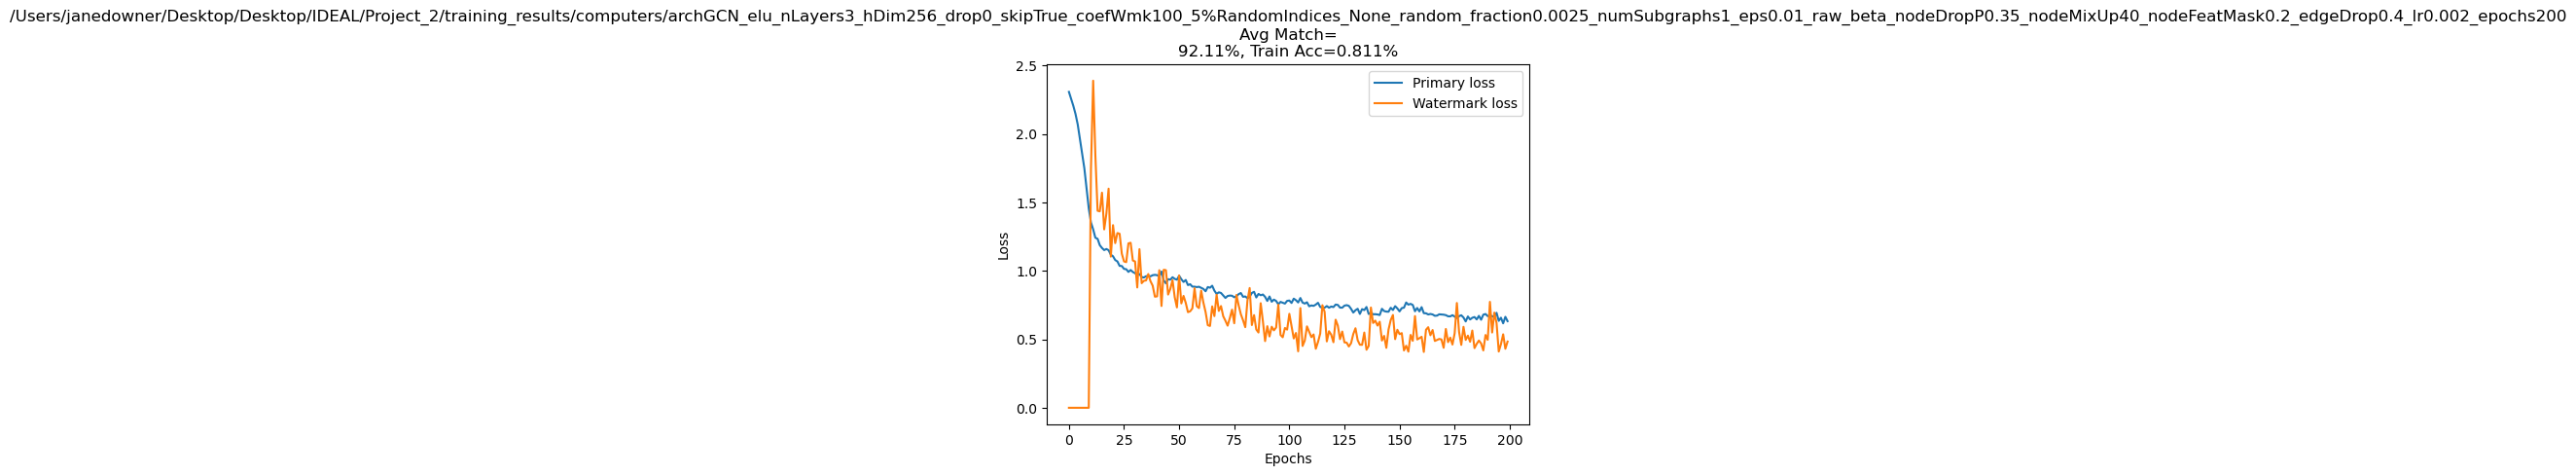



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.005_numSubgraphs2_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.296, loss_watermark = n/a, B*W = n/a, train acc = 0.081, val acc = 0.083
Epoch:   1, loss_primary = 2.242, loss_watermark = n/a, B*W = n/a, train acc = 0.553, val acc = 0.538
Epoch:   2, loss_primary = 2.194, loss_watermark = n/a, B*W = n/a, train acc = 0.657, val acc = 0.633
Epoch:   3, loss_primary = 2.134, loss_watermark = n/a, B*W = n/a, train acc = 0.697, val acc = 0.682
Epoch:   4, loss_primary = 2.063, loss_watermark = n/a, B*W = n/a, train acc = 0.710, val acc = 0.686
Epoch:   5, loss_primary = 1.948, loss_watermark = n/a, B*W = n/a, train acc = 0.722, val acc = 0.705
Epoch:   6, loss_primary = 1.877, loss_watermark = n/a, B*W = n/a, train acc = 0.710, val acc = 0.684
Epoch:   7, loss_primary = 1.738, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.685
Epoch:   8, loss_primary = 1.621, loss_watermark = n/a, B*W = n/a, train acc = 0.708, val acc = 0.677
Epoch:   9, loss_primary = 1.486, loss_watermark = n/a, B*W = n/a, train acc = 0.7

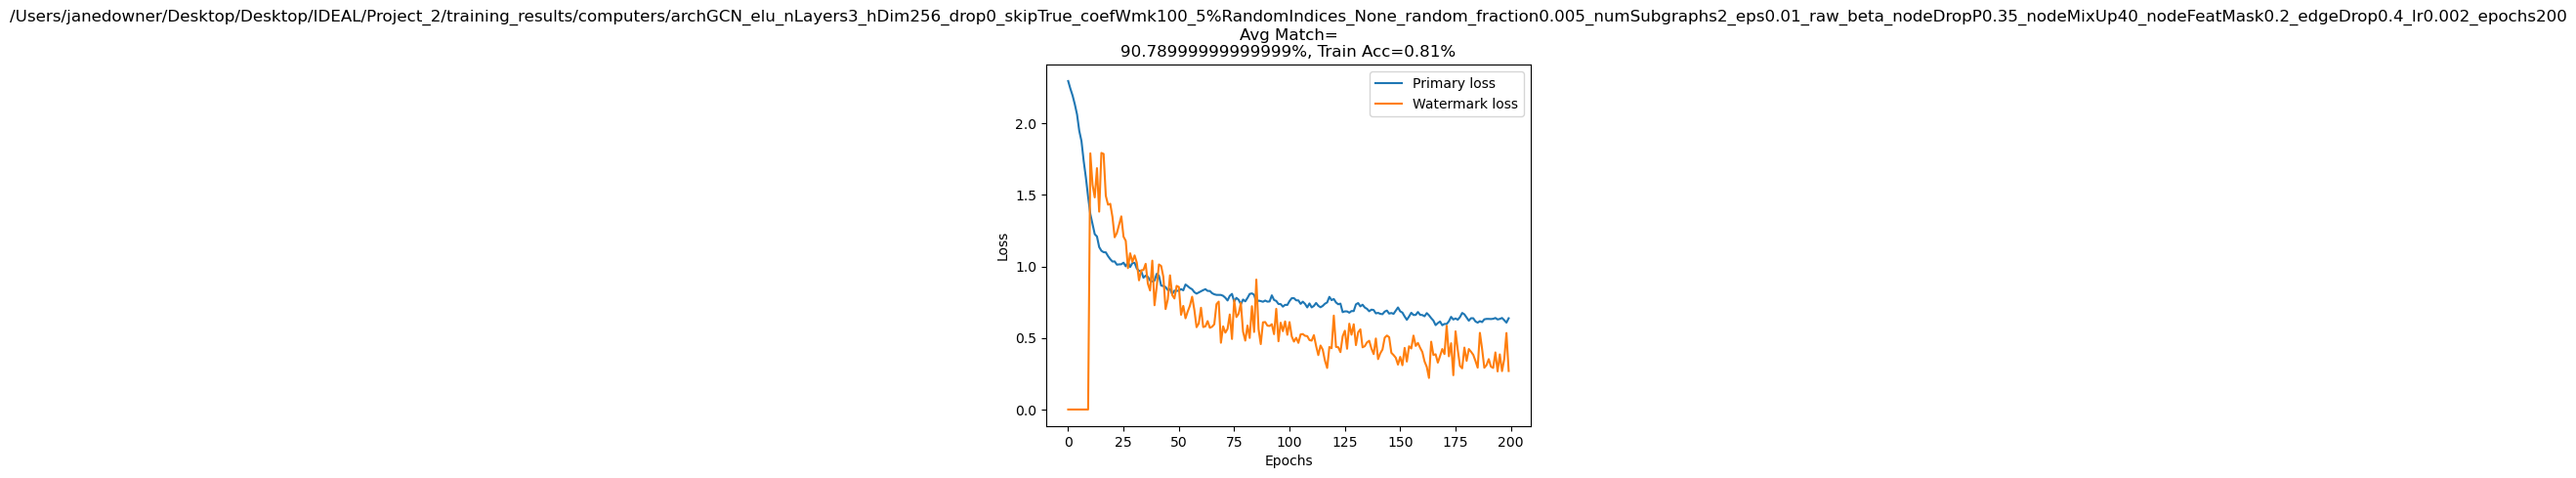



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.0075_numSubgraphs3_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.296, loss_watermark = n/a, B*W = n/a, train acc = 0.237, val acc = 0.231
Epoch:   1, loss_primary = 2.249, loss_watermark = n/a, B*W = n/a, train acc = 0.467, val acc = 0.447
Epoch:   2, loss_primary = 2.194, loss_watermark = n/a, B*W = n/a, train acc = 0.636, val acc = 0.620
Epoch:   3, loss_primary = 2.131, loss_watermark = n/a, B*W = n/a, train acc = 0.691, val acc = 0.661
Epoch:   4, loss_primary = 2.062, loss_watermark = n/a, B*W = n/a, train acc = 0.712, val acc = 0.689
Epoch:   5, loss_primary = 1.973, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.697
Epoch:   6, loss_primary = 1.858, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.708
Epoch:   7, loss_primary = 1.757, loss_watermark = n/a, B*W = n/a, train acc = 0.718, val acc = 0.692
Epoch:   8, loss_primary = 1.607, loss_watermark = n/a, B*W = n/a, train acc = 0.721, val acc = 0.691
Epoch:   9, loss_primary = 1.483, loss_watermark = n/a, B*W = n/a, train acc = 0.7

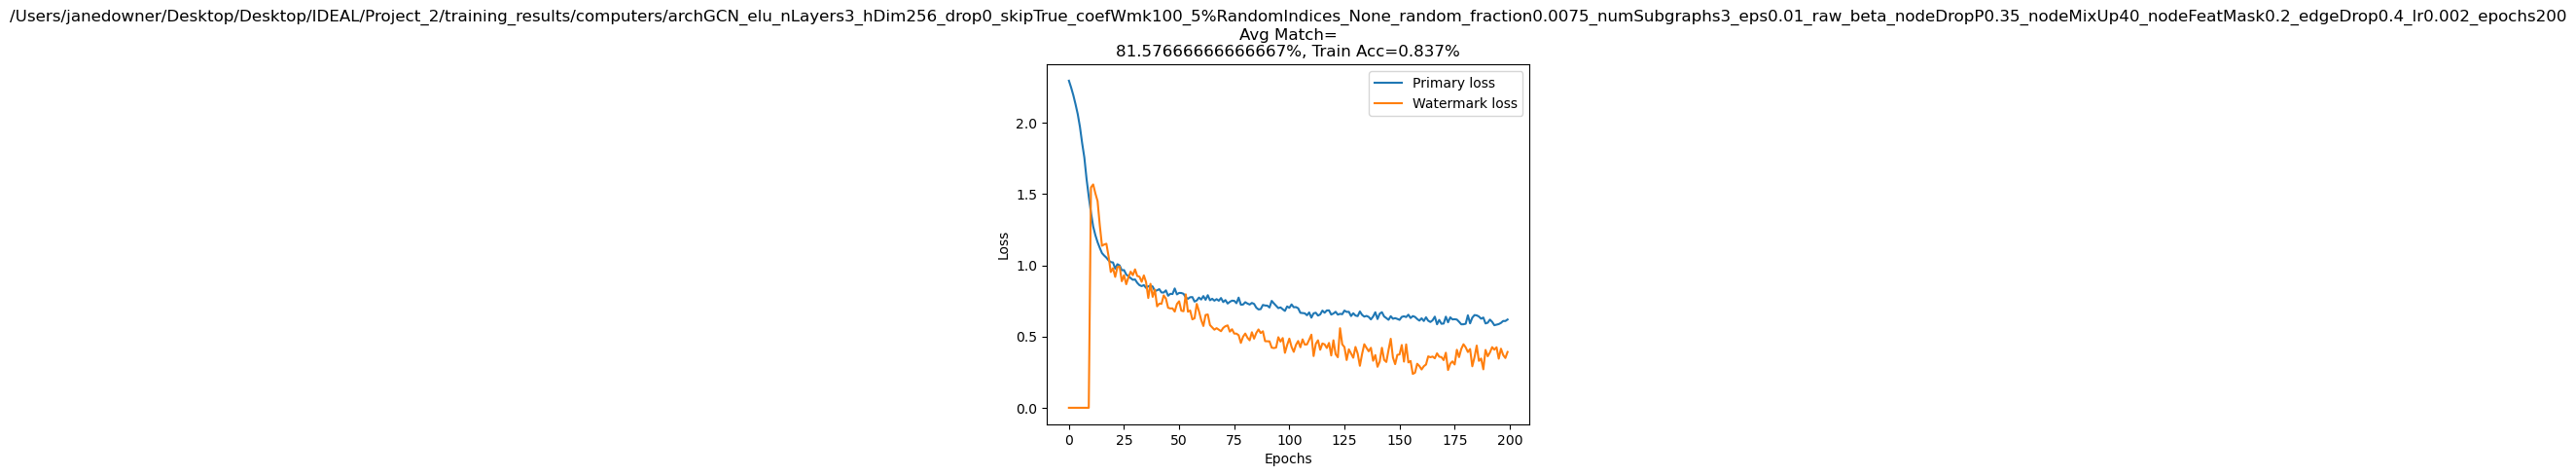



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.01_numSubgraphs4_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.299, loss_watermark = n/a, B*W = n/a, train acc = 0.078, val acc = 0.079
Epoch:   1, loss_primary = 2.255, loss_watermark = n/a, B*W = n/a, train acc = 0.486, val acc = 0.465
Epoch:   2, loss_primary = 2.201, loss_watermark = n/a, B*W = n/a, train acc = 0.658, val acc = 0.635
Epoch:   3, loss_primary = 2.151, loss_watermark = n/a, B*W = n/a, train acc = 0.683, val acc = 0.657
Epoch:   4, loss_primary = 2.064, loss_watermark = n/a, B*W = n/a, train acc = 0.703, val acc = 0.683
Epoch:   5, loss_primary = 1.968, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.685
Epoch:   6, loss_primary = 1.873, loss_watermark = n/a, B*W = n/a, train acc = 0.707, val acc = 0.673
Epoch:   7, loss_primary = 1.762, loss_watermark = n/a, B*W = n/a, train acc = 0.714, val acc = 0.684
Epoch:   8, loss_primary = 1.632, loss_watermark = n/a, B*W = n/a, train acc = 0.722, val acc = 0.694
Epoch:   9, loss_primary = 1.481, loss_watermark = n/a, B*W = n/a, train acc = 0.7

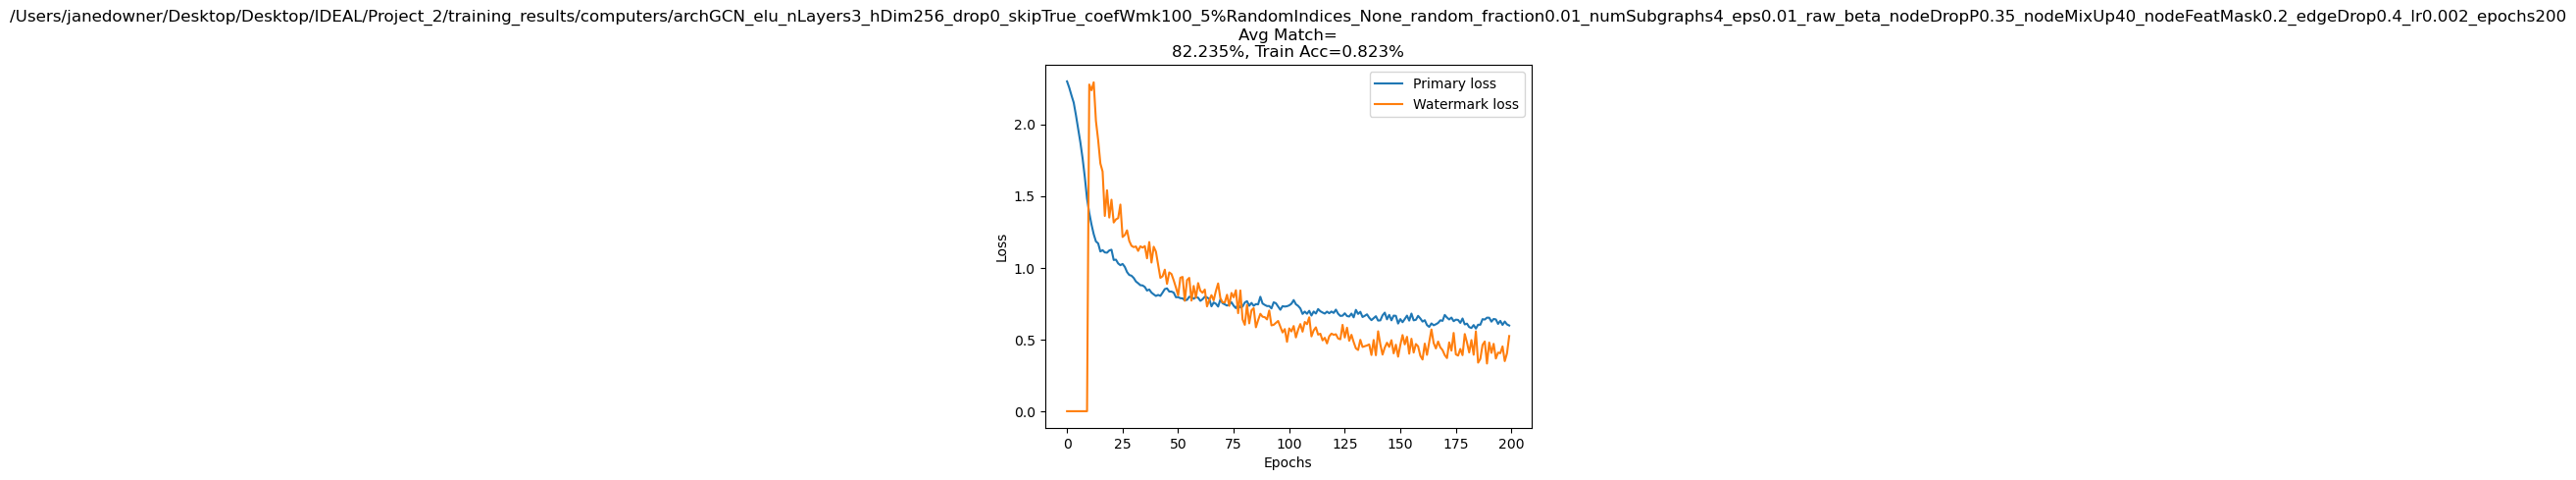



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.0125_numSubgraphs5_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.315, loss_watermark = n/a, B*W = n/a, train acc = 0.047, val acc = 0.048
Epoch:   1, loss_primary = 2.269, loss_watermark = n/a, B*W = n/a, train acc = 0.405, val acc = 0.396
Epoch:   2, loss_primary = 2.217, loss_watermark = n/a, B*W = n/a, train acc = 0.670, val acc = 0.647
Epoch:   3, loss_primary = 2.147, loss_watermark = n/a, B*W = n/a, train acc = 0.701, val acc = 0.676
Epoch:   4, loss_primary = 2.076, loss_watermark = n/a, B*W = n/a, train acc = 0.712, val acc = 0.682
Epoch:   5, loss_primary = 1.968, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.691
Epoch:   6, loss_primary = 1.856, loss_watermark = n/a, B*W = n/a, train acc = 0.712, val acc = 0.688
Epoch:   7, loss_primary = 1.731, loss_watermark = n/a, B*W = n/a, train acc = 0.704, val acc = 0.675
Epoch:   8, loss_primary = 1.611, loss_watermark = n/a, B*W = n/a, train acc = 0.706, val acc = 0.675
Epoch:   9, loss_primary = 1.480, loss_watermark = n/a, B*W = n/a, train acc = 0.7

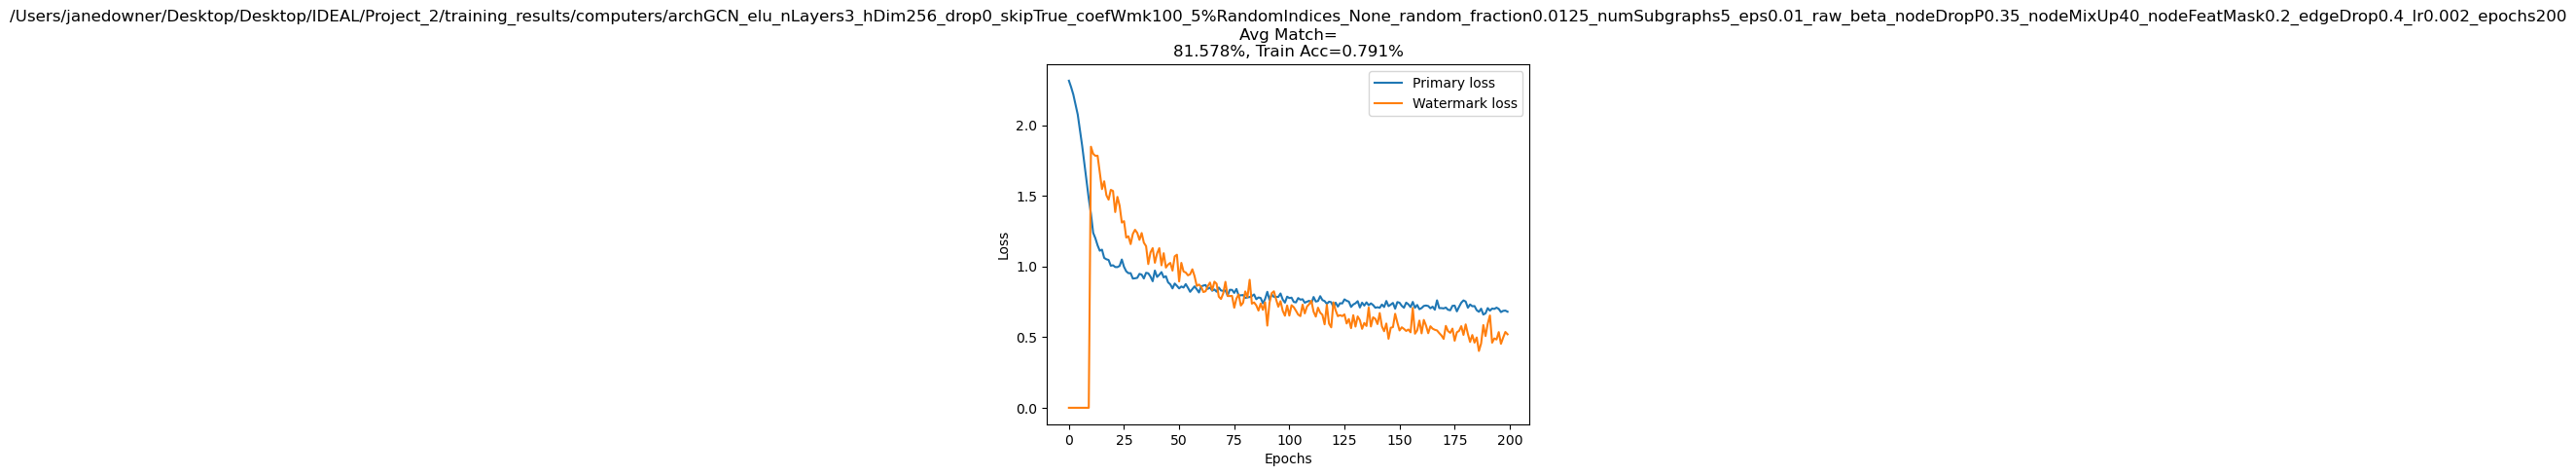



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.0025_numSubgraphs1_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.298, loss_watermark = n/a, B*W = n/a, train acc = 0.151, val acc = 0.150
Epoch:   1, loss_primary = 2.248, loss_watermark = n/a, B*W = n/a, train acc = 0.521, val acc = 0.499
Epoch:   2, loss_primary = 2.199, loss_watermark = n/a, B*W = n/a, train acc = 0.646, val acc = 0.608
Epoch:   3, loss_primary = 2.123, loss_watermark = n/a, B*W = n/a, train acc = 0.700, val acc = 0.668
Epoch:   4, loss_primary = 2.051, loss_watermark = n/a, B*W = n/a, train acc = 0.696, val acc = 0.669
Epoch:   5, loss_primary = 1.945, loss_watermark = n/a, B*W = n/a, train acc = 0.714, val acc = 0.679
Epoch:   6, loss_primary = 1.842, loss_watermark = n/a, B*W = n/a, train acc = 0.712, val acc = 0.676
Epoch:   7, loss_primary = 1.713, loss_watermark = n/a, B*W = n/a, train acc = 0.721, val acc = 0.689
Epoch:   8, loss_primary = 1.574, loss_watermark = n/a, B*W = n/a, train acc = 0.708, val acc = 0.680
Epoch:   9, loss_primary = 1.452, loss_watermark = n/a, B*W = n/a, train acc = 0.7

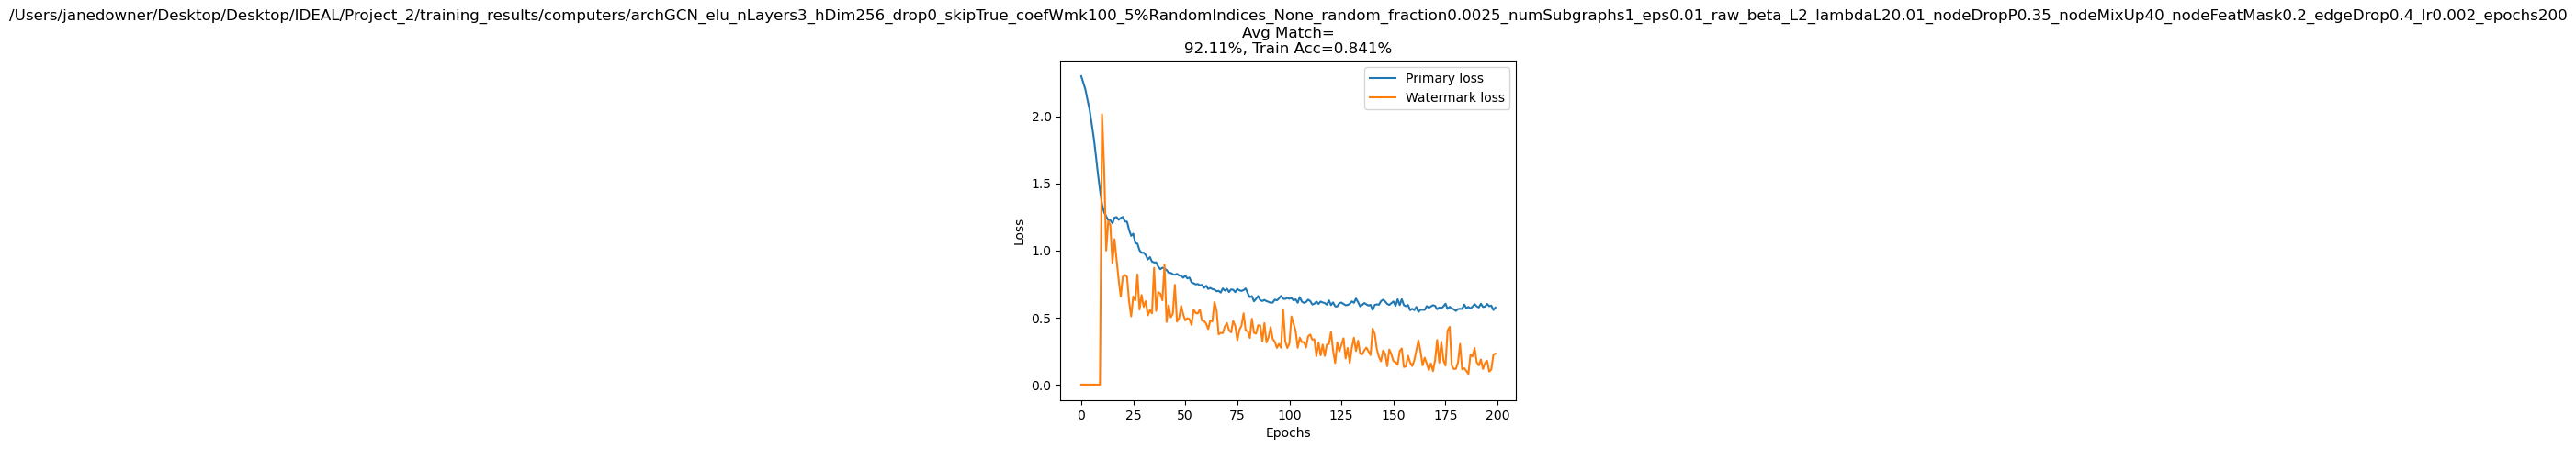



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.005_numSubgraphs2_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.299, loss_watermark = n/a, B*W = n/a, train acc = 0.101, val acc = 0.106
Epoch:   1, loss_primary = 2.256, loss_watermark = n/a, B*W = n/a, train acc = 0.596, val acc = 0.579
Epoch:   2, loss_primary = 2.198, loss_watermark = n/a, B*W = n/a, train acc = 0.692, val acc = 0.666
Epoch:   3, loss_primary = 2.134, loss_watermark = n/a, B*W = n/a, train acc = 0.705, val acc = 0.681
Epoch:   4, loss_primary = 2.060, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.692
Epoch:   5, loss_primary = 1.969, loss_watermark = n/a, B*W = n/a, train acc = 0.706, val acc = 0.666
Epoch:   6, loss_primary = 1.865, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.690
Epoch:   7, loss_primary = 1.734, loss_watermark = n/a, B*W = n/a, train acc = 0.714, val acc = 0.685
Epoch:   8, loss_primary = 1.605, loss_watermark = n/a, B*W = n/a, train acc = 0.711, val acc = 0.680
Epoch:   9, loss_primary = 1.477, loss_watermark = n/a, B*W = n/a, train acc = 0.7

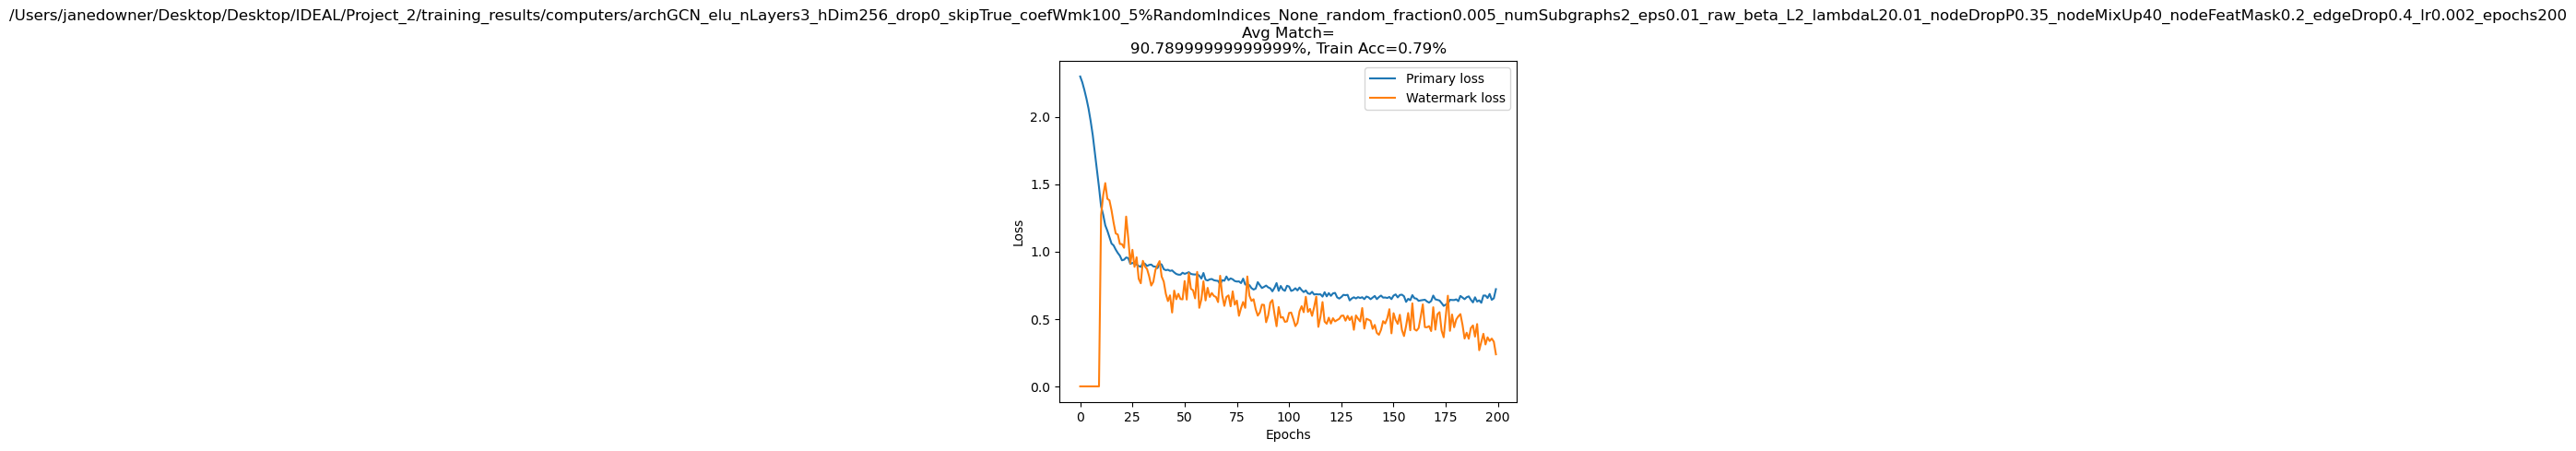



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.0075_numSubgraphs3_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.313, loss_watermark = n/a, B*W = n/a, train acc = 0.031, val acc = 0.040
Epoch:   1, loss_primary = 2.262, loss_watermark = n/a, B*W = n/a, train acc = 0.427, val acc = 0.405
Epoch:   2, loss_primary = 2.209, loss_watermark = n/a, B*W = n/a, train acc = 0.702, val acc = 0.677
Epoch:   3, loss_primary = 2.138, loss_watermark = n/a, B*W = n/a, train acc = 0.738, val acc = 0.709
Epoch:   4, loss_primary = 2.057, loss_watermark = n/a, B*W = n/a, train acc = 0.734, val acc = 0.708
Epoch:   5, loss_primary = 1.965, loss_watermark = n/a, B*W = n/a, train acc = 0.731, val acc = 0.703
Epoch:   6, loss_primary = 1.858, loss_watermark = n/a, B*W = n/a, train acc = 0.739, val acc = 0.711
Epoch:   7, loss_primary = 1.735, loss_watermark = n/a, B*W = n/a, train acc = 0.722, val acc = 0.700
Epoch:   8, loss_primary = 1.598, loss_watermark = n/a, B*W = n/a, train acc = 0.721, val acc = 0.690
Epoch:   9, loss_primary = 1.479, loss_watermark = n/a, B*W = n/a, train acc = 0.7

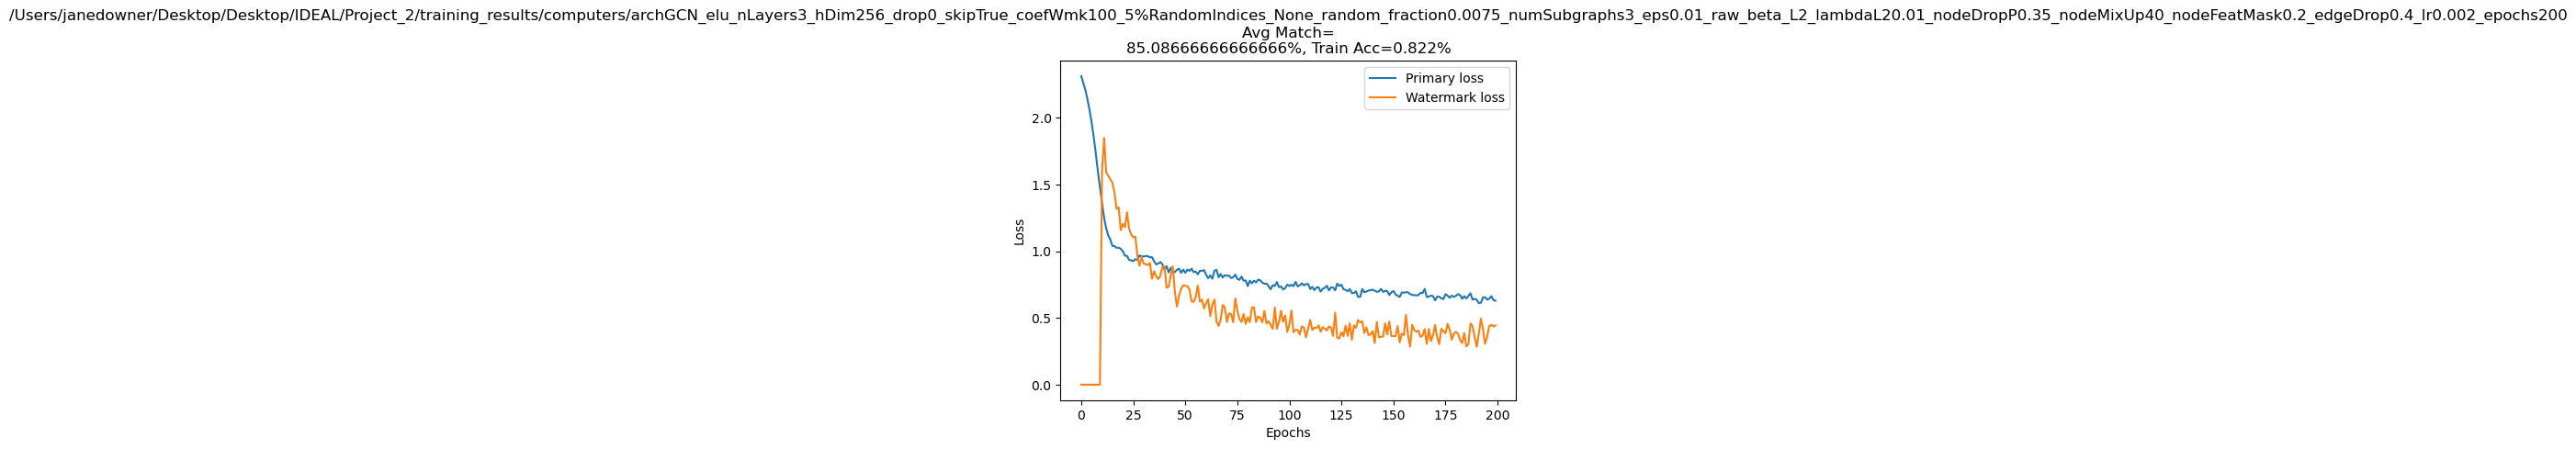



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.01_numSubgraphs4_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.297, loss_watermark = n/a, B*W = n/a, train acc = 0.111, val acc = 0.127
Epoch:   1, loss_primary = 2.255, loss_watermark = n/a, B*W = n/a, train acc = 0.563, val acc = 0.554
Epoch:   2, loss_primary = 2.203, loss_watermark = n/a, B*W = n/a, train acc = 0.650, val acc = 0.635
Epoch:   3, loss_primary = 2.141, loss_watermark = n/a, B*W = n/a, train acc = 0.696, val acc = 0.672
Epoch:   4, loss_primary = 2.056, loss_watermark = n/a, B*W = n/a, train acc = 0.699, val acc = 0.669
Epoch:   5, loss_primary = 1.977, loss_watermark = n/a, B*W = n/a, train acc = 0.698, val acc = 0.659
Epoch:   6, loss_primary = 1.853, loss_watermark = n/a, B*W = n/a, train acc = 0.709, val acc = 0.670
Epoch:   7, loss_primary = 1.747, loss_watermark = n/a, B*W = n/a, train acc = 0.689, val acc = 0.662
Epoch:   8, loss_primary = 1.624, loss_watermark = n/a, B*W = n/a, train acc = 0.696, val acc = 0.673
Epoch:   9, loss_primary = 1.480, loss_watermark = n/a, B*W = n/a, train acc = 0.6

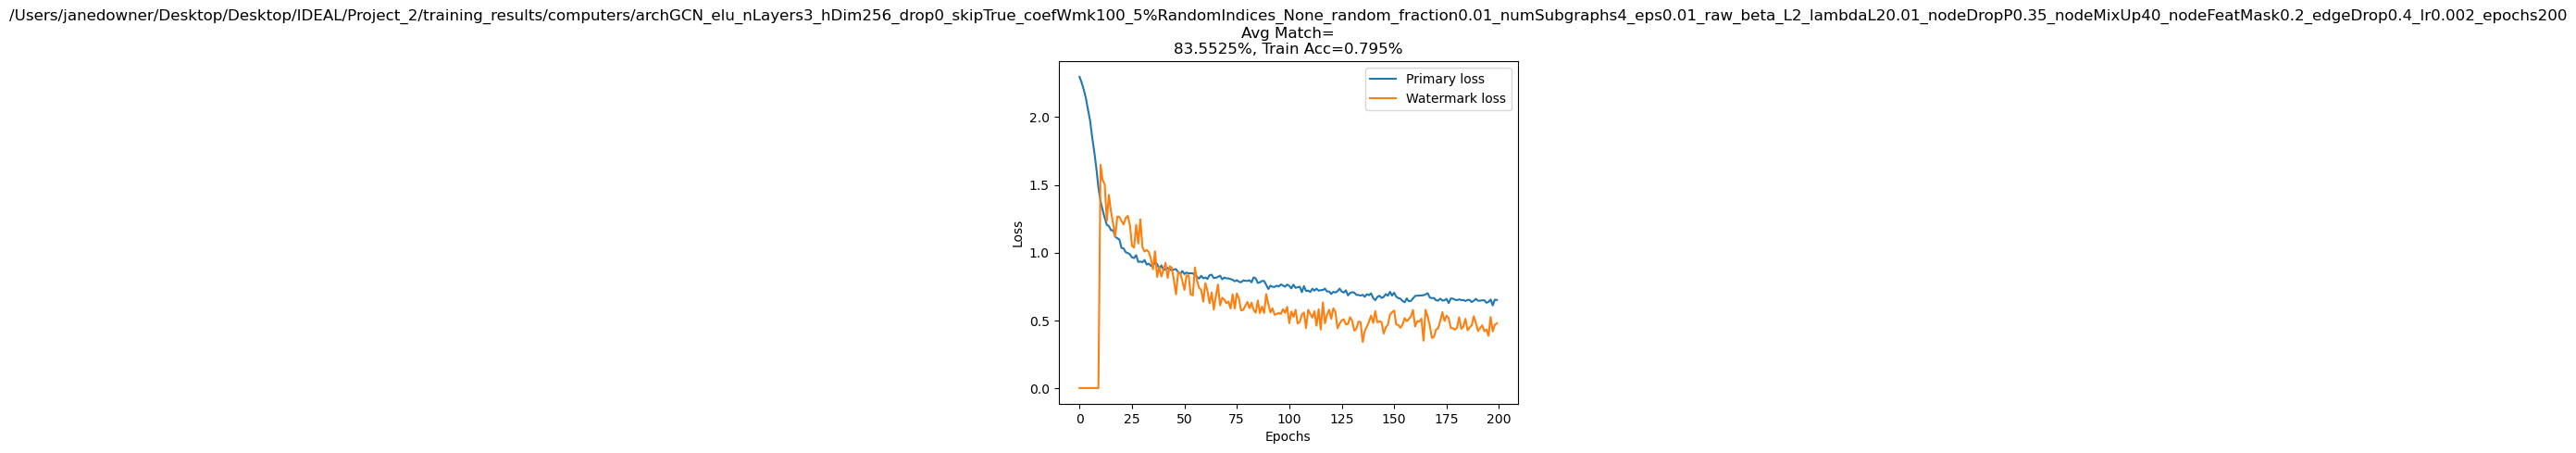



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%RandomIndices_None_random_fraction0.0125_numSubgraphs5_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.291, loss_watermark = n/a, B*W = n/a, train acc = 0.146, val acc = 0.156
Epoch:   1, loss_primary = 2.243, loss_watermark = n/a, B*W = n/a, train acc = 0.540, val acc = 0.531
Epoch:   2, loss_primary = 2.188, loss_watermark = n/a, B*W = n/a, train acc = 0.670, val acc = 0.649
Epoch:   3, loss_primary = 2.126, loss_watermark = n/a, B*W = n/a, train acc = 0.714, val acc = 0.681
Epoch:   4, loss_primary = 2.058, loss_watermark = n/a, B*W = n/a, train acc = 0.709, val acc = 0.688
Epoch:   5, loss_primary = 1.955, loss_watermark = n/a, B*W = n/a, train acc = 0.715, val acc = 0.684
Epoch:   6, loss_primary = 1.840, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.689
Epoch:   7, loss_primary = 1.722, loss_watermark = n/a, B*W = n/a, train acc = 0.718, val acc = 0.690
Epoch:   8, loss_primary = 1.603, loss_watermark = n/a, B*W = n/a, train acc = 0.720, val acc = 0.688
Epoch:   9, loss_primary = 1.469, loss_watermark = n/a, B*W = n/a, train acc = 0.7

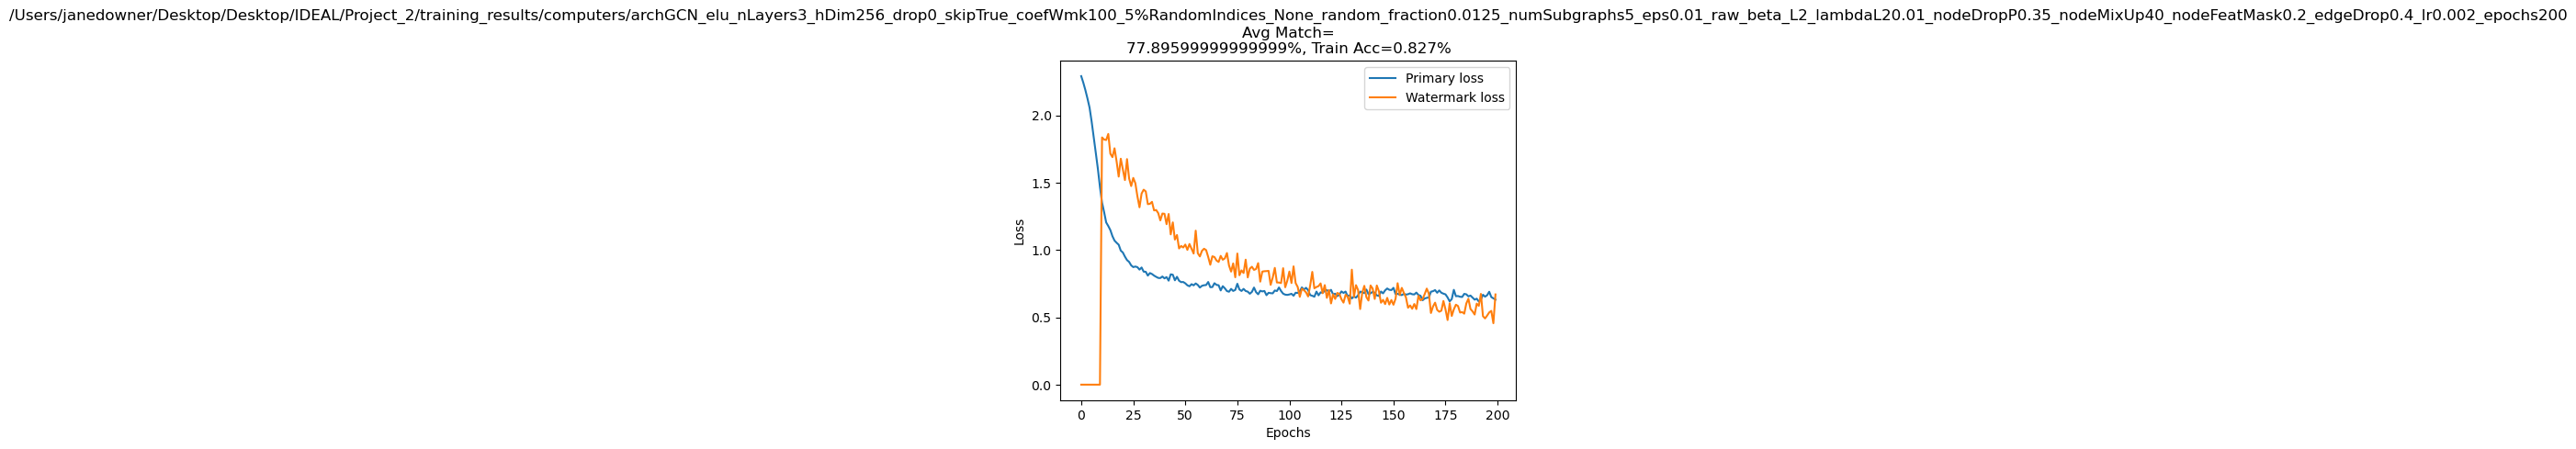



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.0025_numSubgraphs1_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.306, loss_watermark = n/a, B*W = n/a, train acc = 0.076, val acc = 0.083
Epoch:   1, loss_primary = 2.261, loss_watermark = n/a, B*W = n/a, train acc = 0.512, val acc = 0.484
Epoch:   2, loss_primary = 2.210, loss_watermark = n/a, B*W = n/a, train acc = 0.680, val acc = 0.664
Epoch:   3, loss_primary = 2.154, loss_watermark = n/a, B*W = n/a, train acc = 0.725, val acc = 0.699
Epoch:   4, loss_primary = 2.078, loss_watermark = n/a, B*W = n/a, train acc = 0.746, val acc = 0.714
Epoch:   5, loss_primary = 1.992, loss_watermark = n/a, B*W = n/a, train acc = 0.733, val acc = 0.708
Epoch:   6, loss_primary = 1.864, loss_watermark = n/a, B*W = n/a, train acc = 0.736, val acc = 0.711
Epoch:   7, loss_primary = 1.754, loss_watermark = n/a, B*W = n/a, train acc = 0.732, val acc = 0.697
Epoch:   8, loss_primary = 1.621, loss_watermark = n/a, B*W = n/a, train acc = 0.723, val acc = 0.692
Epoch:   9, loss_primary = 1.489, loss_watermark = n/a, B*W = n/a, train acc = 0.7

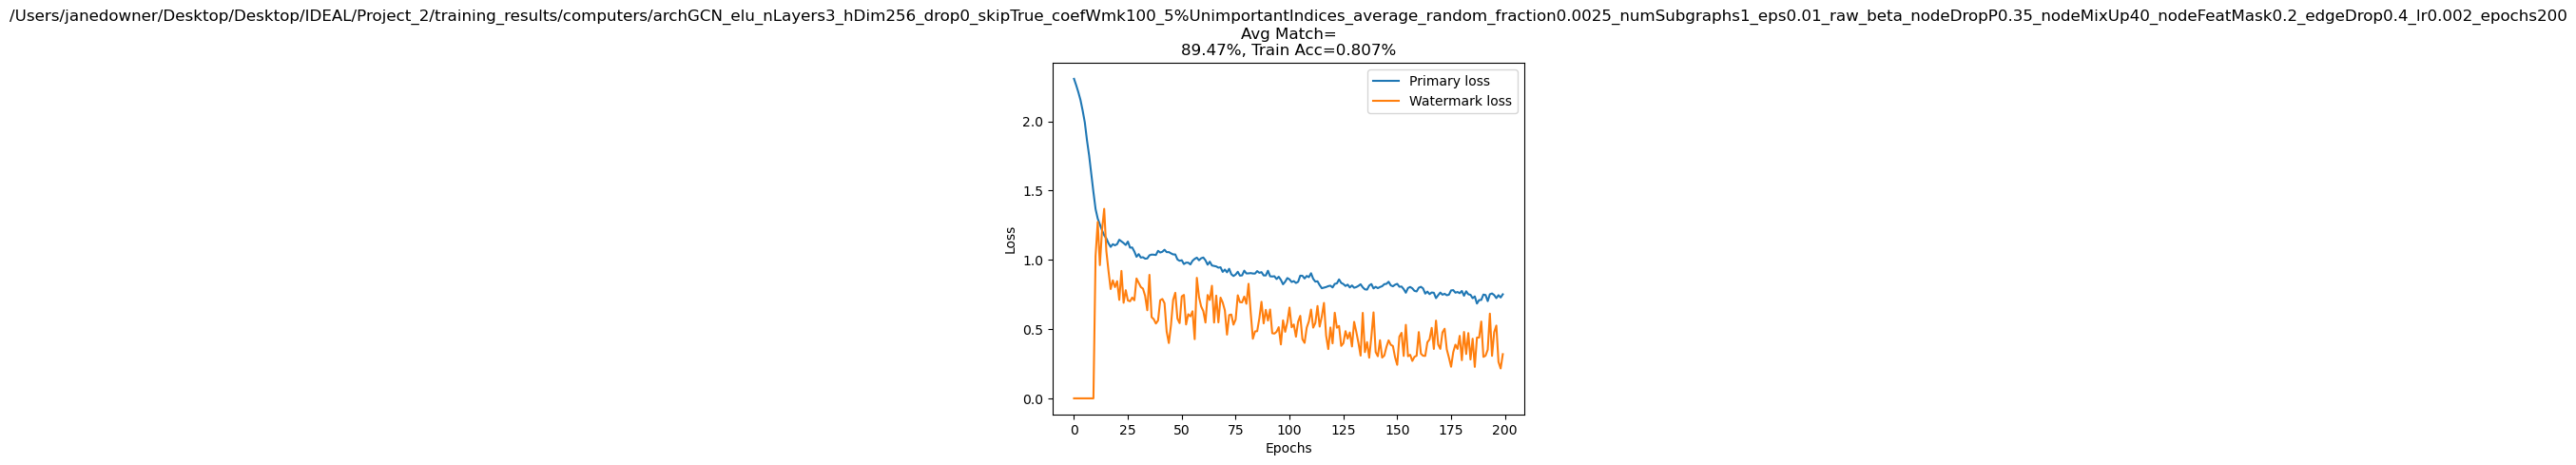



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.005_numSubgraphs2_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.324, loss_watermark = n/a, B*W = n/a, train acc = 0.048, val acc = 0.047
Epoch:   1, loss_primary = 2.277, loss_watermark = n/a, B*W = n/a, train acc = 0.262, val acc = 0.256
Epoch:   2, loss_primary = 2.223, loss_watermark = n/a, B*W = n/a, train acc = 0.648, val acc = 0.617
Epoch:   3, loss_primary = 2.170, loss_watermark = n/a, B*W = n/a, train acc = 0.710, val acc = 0.672
Epoch:   4, loss_primary = 2.076, loss_watermark = n/a, B*W = n/a, train acc = 0.729, val acc = 0.706
Epoch:   5, loss_primary = 1.989, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.693
Epoch:   6, loss_primary = 1.878, loss_watermark = n/a, B*W = n/a, train acc = 0.732, val acc = 0.704
Epoch:   7, loss_primary = 1.756, loss_watermark = n/a, B*W = n/a, train acc = 0.732, val acc = 0.708
Epoch:   8, loss_primary = 1.614, loss_watermark = n/a, B*W = n/a, train acc = 0.718, val acc = 0.694
Epoch:   9, loss_primary = 1.504, loss_watermark = n/a, B*W = n/a, train acc = 0.7

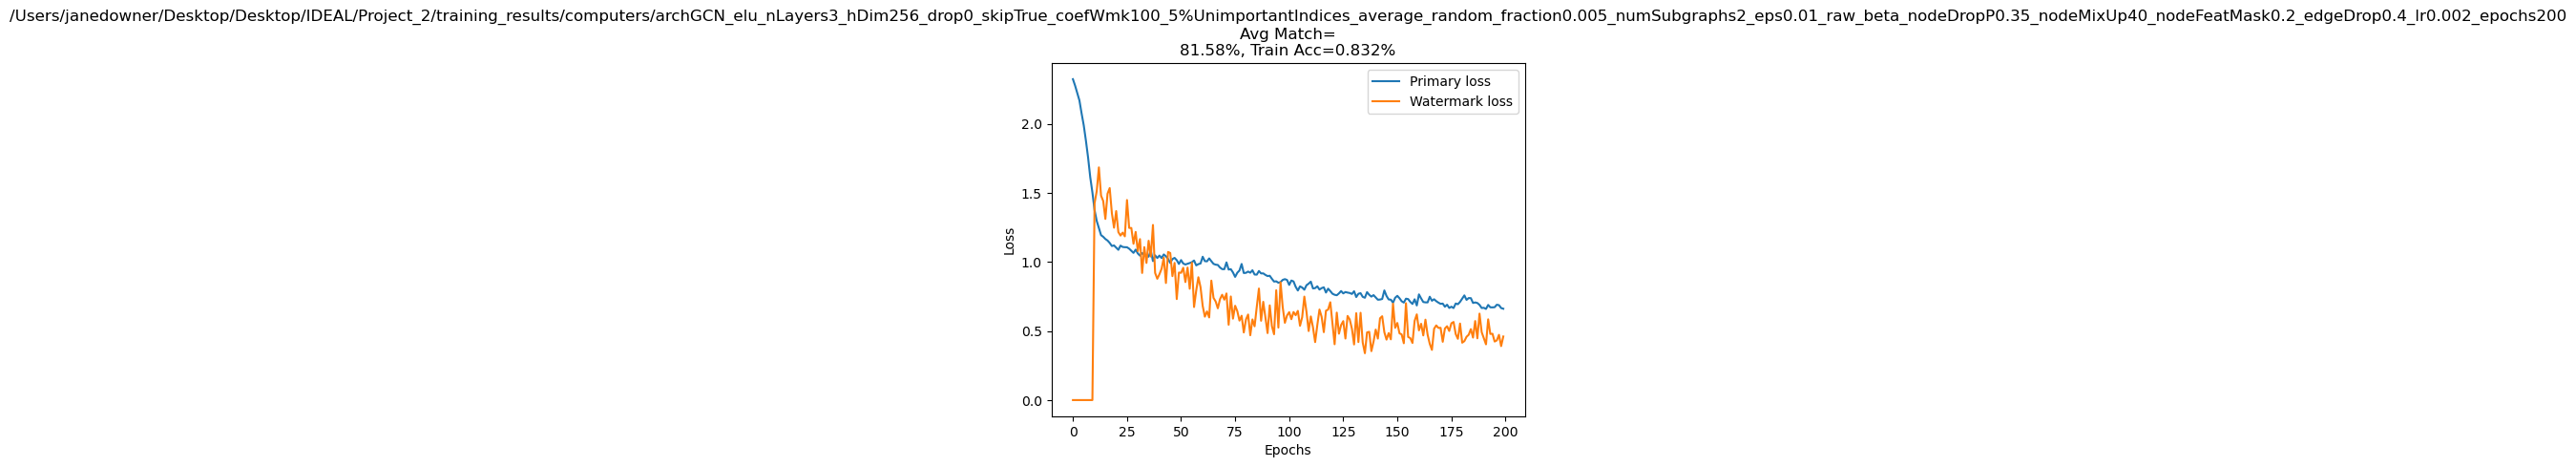



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.0075_numSubgraphs3_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.312, loss_watermark = n/a, B*W = n/a, train acc = 0.092, val acc = 0.089
Epoch:   1, loss_primary = 2.265, loss_watermark = n/a, B*W = n/a, train acc = 0.380, val acc = 0.364
Epoch:   2, loss_primary = 2.210, loss_watermark = n/a, B*W = n/a, train acc = 0.635, val acc = 0.613
Epoch:   3, loss_primary = 2.140, loss_watermark = n/a, B*W = n/a, train acc = 0.694, val acc = 0.670
Epoch:   4, loss_primary = 2.068, loss_watermark = n/a, B*W = n/a, train acc = 0.712, val acc = 0.684
Epoch:   5, loss_primary = 1.980, loss_watermark = n/a, B*W = n/a, train acc = 0.702, val acc = 0.675
Epoch:   6, loss_primary = 1.882, loss_watermark = n/a, B*W = n/a, train acc = 0.710, val acc = 0.682
Epoch:   7, loss_primary = 1.754, loss_watermark = n/a, B*W = n/a, train acc = 0.715, val acc = 0.689
Epoch:   8, loss_primary = 1.628, loss_watermark = n/a, B*W = n/a, train acc = 0.715, val acc = 0.685
Epoch:   9, loss_primary = 1.474, loss_watermark = n/a, B*W = n/a, train acc = 0.7

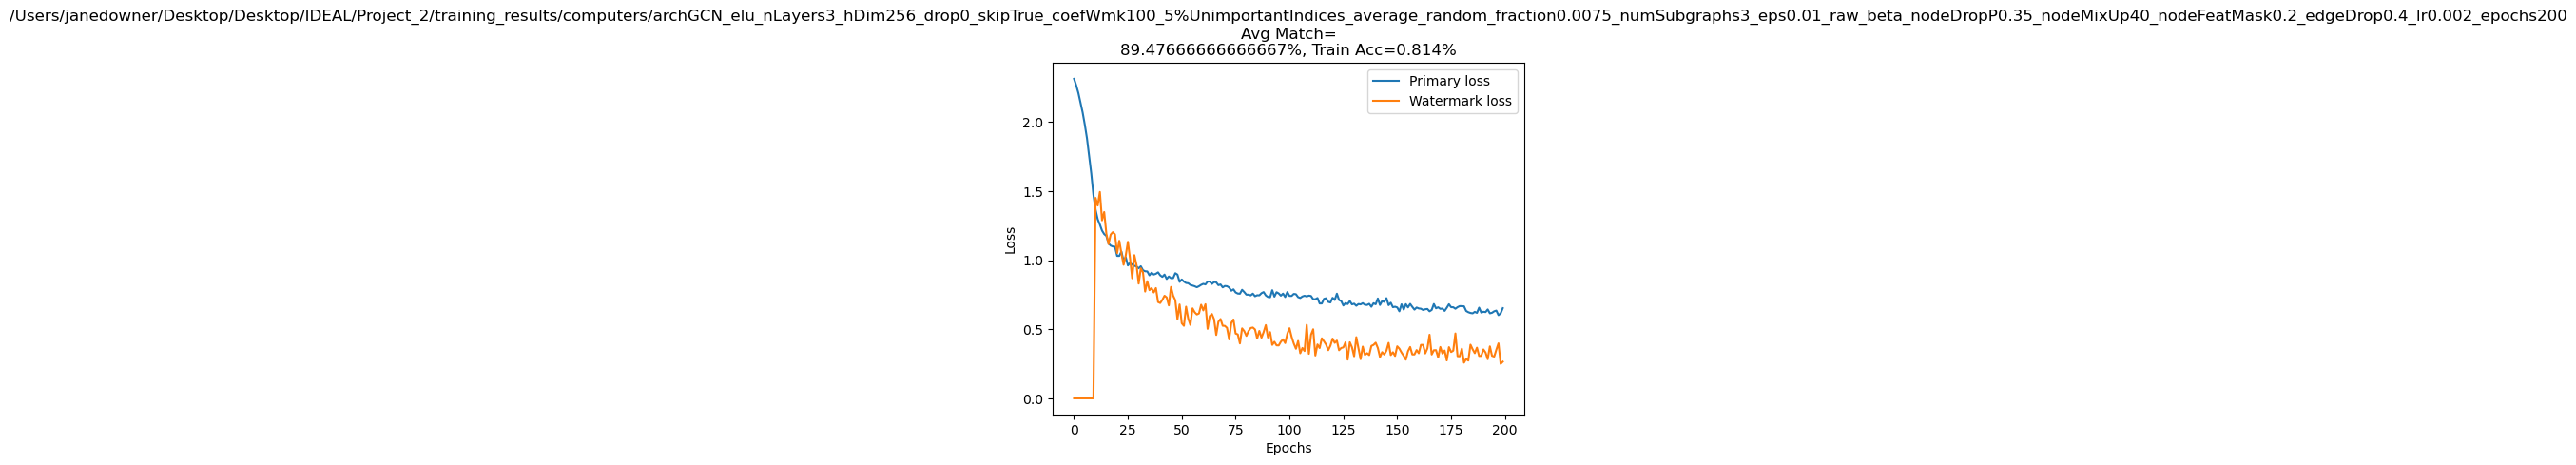



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.01_numSubgraphs4_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.306, loss_watermark = n/a, B*W = n/a, train acc = 0.073, val acc = 0.080
Epoch:   1, loss_primary = 2.256, loss_watermark = n/a, B*W = n/a, train acc = 0.542, val acc = 0.522
Epoch:   2, loss_primary = 2.207, loss_watermark = n/a, B*W = n/a, train acc = 0.658, val acc = 0.627
Epoch:   3, loss_primary = 2.145, loss_watermark = n/a, B*W = n/a, train acc = 0.702, val acc = 0.673
Epoch:   4, loss_primary = 2.061, loss_watermark = n/a, B*W = n/a, train acc = 0.718, val acc = 0.696
Epoch:   5, loss_primary = 1.970, loss_watermark = n/a, B*W = n/a, train acc = 0.734, val acc = 0.704
Epoch:   6, loss_primary = 1.865, loss_watermark = n/a, B*W = n/a, train acc = 0.723, val acc = 0.696
Epoch:   7, loss_primary = 1.755, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.701
Epoch:   8, loss_primary = 1.620, loss_watermark = n/a, B*W = n/a, train acc = 0.725, val acc = 0.702
Epoch:   9, loss_primary = 1.481, loss_watermark = n/a, B*W = n/a, train acc = 0.7

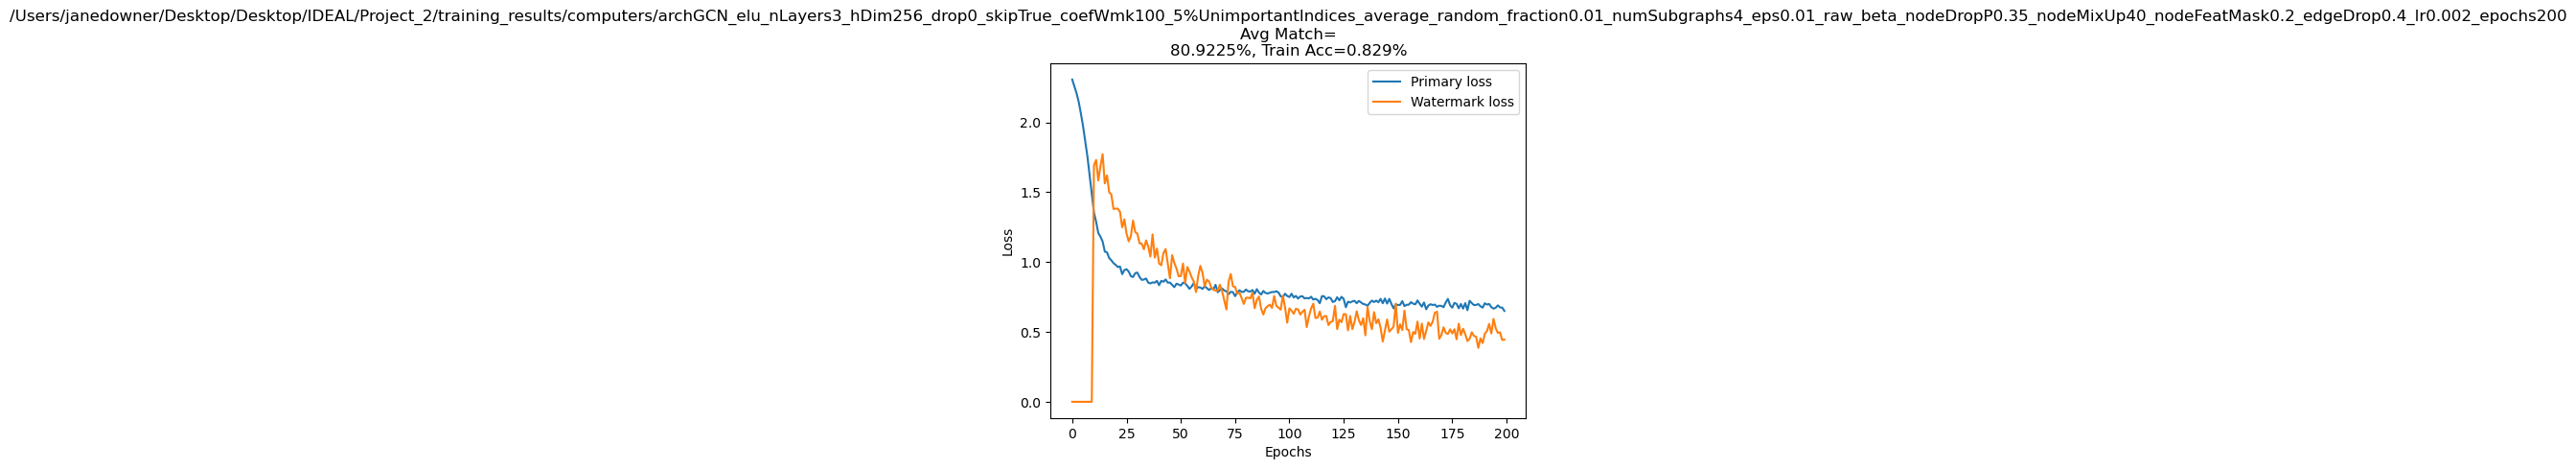



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.0125_numSubgraphs5_eps0.01_raw_beta_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.306, loss_watermark = n/a, B*W = n/a, train acc = 0.079, val acc = 0.072
Epoch:   1, loss_primary = 2.258, loss_watermark = n/a, B*W = n/a, train acc = 0.429, val acc = 0.405
Epoch:   2, loss_primary = 2.205, loss_watermark = n/a, B*W = n/a, train acc = 0.633, val acc = 0.609
Epoch:   3, loss_primary = 2.135, loss_watermark = n/a, B*W = n/a, train acc = 0.672, val acc = 0.652
Epoch:   4, loss_primary = 2.062, loss_watermark = n/a, B*W = n/a, train acc = 0.678, val acc = 0.656
Epoch:   5, loss_primary = 1.964, loss_watermark = n/a, B*W = n/a, train acc = 0.703, val acc = 0.668
Epoch:   6, loss_primary = 1.835, loss_watermark = n/a, B*W = n/a, train acc = 0.710, val acc = 0.682
Epoch:   7, loss_primary = 1.726, loss_watermark = n/a, B*W = n/a, train acc = 0.698, val acc = 0.668
Epoch:   8, loss_primary = 1.583, loss_watermark = n/a, B*W = n/a, train acc = 0.691, val acc = 0.671
Epoch:   9, loss_primary = 1.475, loss_watermark = n/a, B*W = n/a, train acc = 0.6

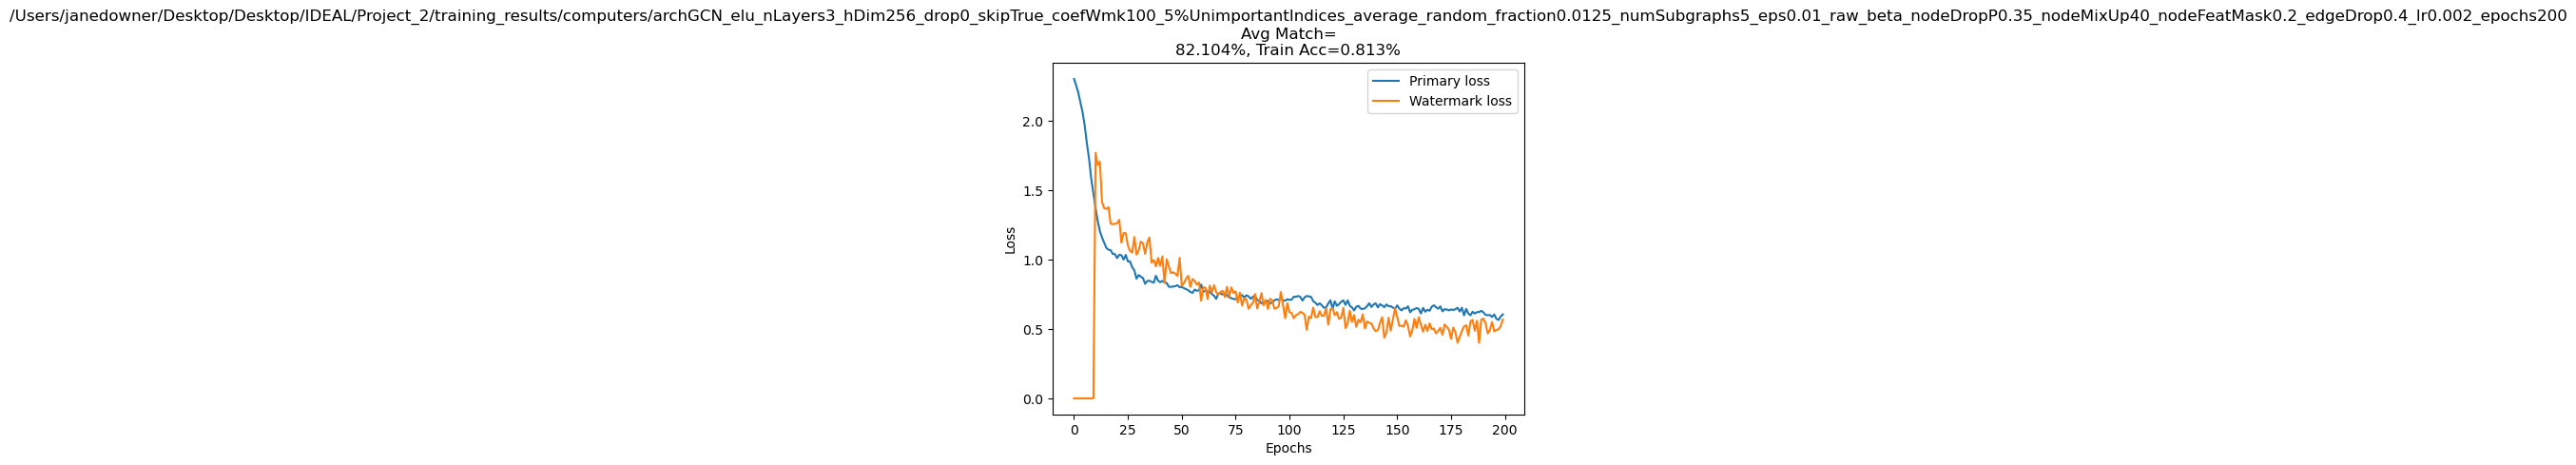



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.0025_numSubgraphs1_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.306, loss_watermark = n/a, B*W = n/a, train acc = 0.109, val acc = 0.110
Epoch:   1, loss_primary = 2.257, loss_watermark = n/a, B*W = n/a, train acc = 0.574, val acc = 0.535
Epoch:   2, loss_primary = 2.198, loss_watermark = n/a, B*W = n/a, train acc = 0.686, val acc = 0.664
Epoch:   3, loss_primary = 2.139, loss_watermark = n/a, B*W = n/a, train acc = 0.717, val acc = 0.687
Epoch:   4, loss_primary = 2.065, loss_watermark = n/a, B*W = n/a, train acc = 0.704, val acc = 0.677
Epoch:   5, loss_primary = 1.965, loss_watermark = n/a, B*W = n/a, train acc = 0.713, val acc = 0.689
Epoch:   6, loss_primary = 1.838, loss_watermark = n/a, B*W = n/a, train acc = 0.731, val acc = 0.706
Epoch:   7, loss_primary = 1.745, loss_watermark = n/a, B*W = n/a, train acc = 0.715, val acc = 0.687
Epoch:   8, loss_primary = 1.583, loss_watermark = n/a, B*W = n/a, train acc = 0.708, val acc = 0.679
Epoch:   9, loss_primary = 1.482, loss_watermark = n/a, B*W = n/a, train acc = 0.7

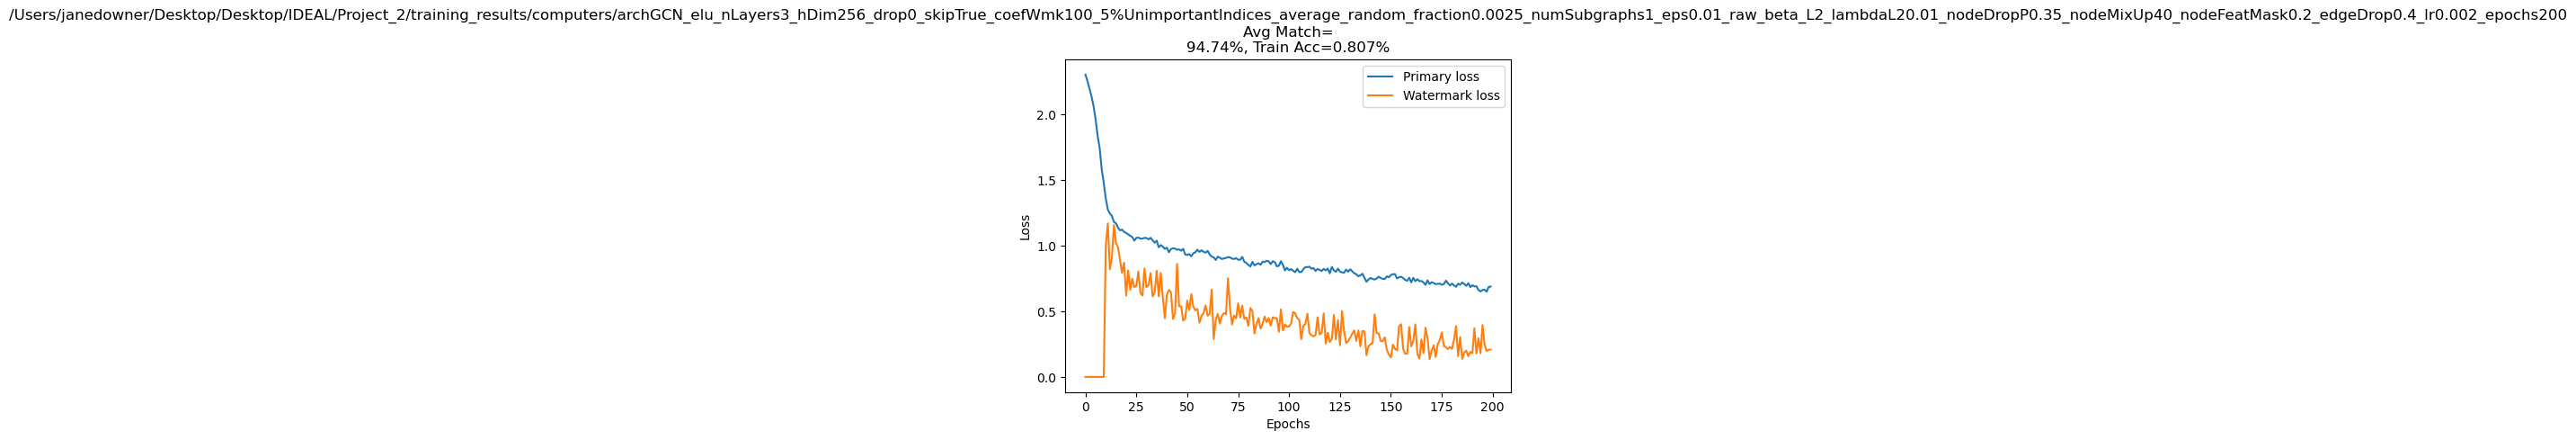



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.005_numSubgraphs2_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.299, loss_watermark = n/a, B*W = n/a, train acc = 0.087, val acc = 0.084
Epoch:   1, loss_primary = 2.248, loss_watermark = n/a, B*W = n/a, train acc = 0.593, val acc = 0.572
Epoch:   2, loss_primary = 2.195, loss_watermark = n/a, B*W = n/a, train acc = 0.688, val acc = 0.661
Epoch:   3, loss_primary = 2.139, loss_watermark = n/a, B*W = n/a, train acc = 0.698, val acc = 0.669
Epoch:   4, loss_primary = 2.054, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.698
Epoch:   5, loss_primary = 1.969, loss_watermark = n/a, B*W = n/a, train acc = 0.709, val acc = 0.679
Epoch:   6, loss_primary = 1.838, loss_watermark = n/a, B*W = n/a, train acc = 0.711, val acc = 0.681
Epoch:   7, loss_primary = 1.741, loss_watermark = n/a, B*W = n/a, train acc = 0.696, val acc = 0.663
Epoch:   8, loss_primary = 1.594, loss_watermark = n/a, B*W = n/a, train acc = 0.705, val acc = 0.680
Epoch:   9, loss_primary = 1.467, loss_watermark = n/a, B*W = n/a, train acc = 0.6

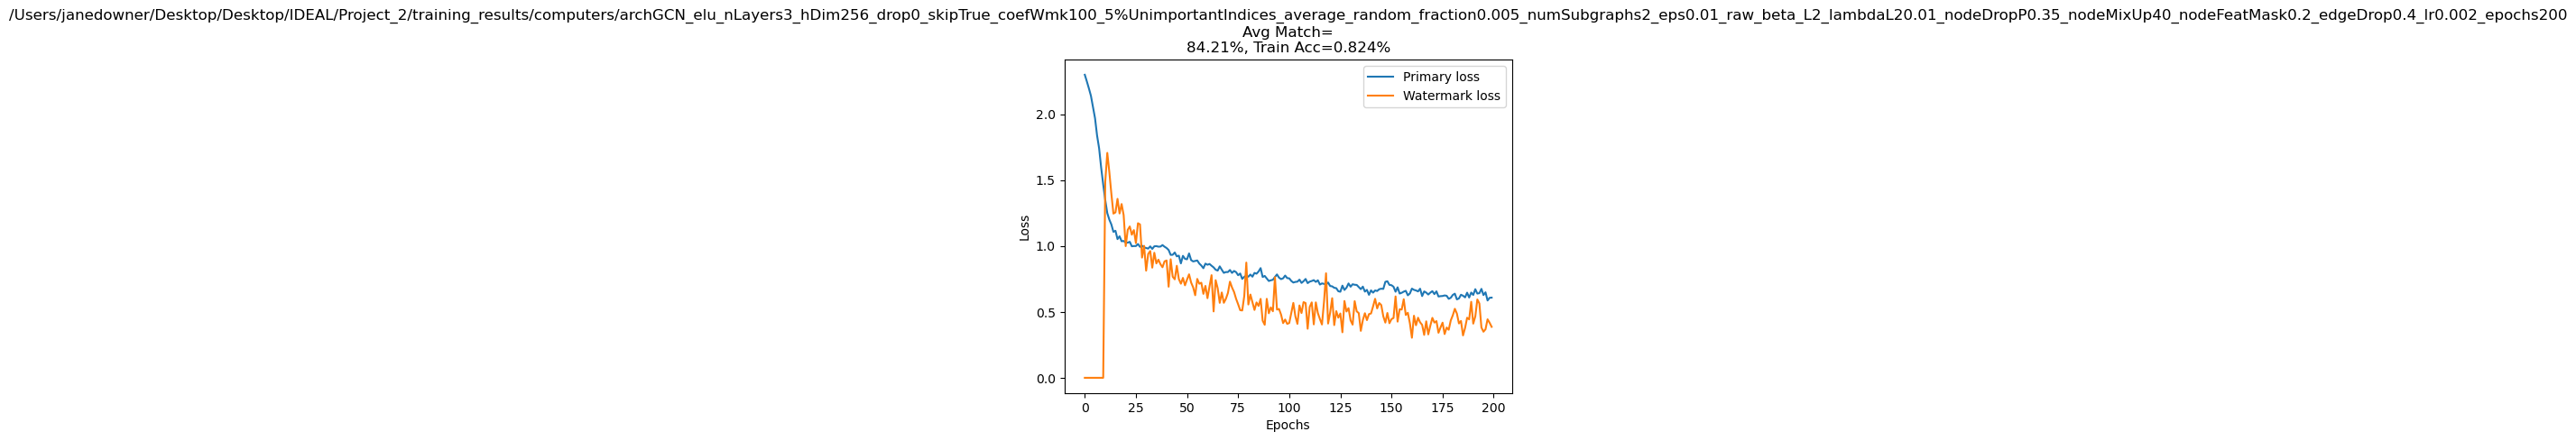



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.0075_numSubgraphs3_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.302, loss_watermark = n/a, B*W = n/a, train acc = 0.102, val acc = 0.100
Epoch:   1, loss_primary = 2.253, loss_watermark = n/a, B*W = n/a, train acc = 0.509, val acc = 0.482
Epoch:   2, loss_primary = 2.194, loss_watermark = n/a, B*W = n/a, train acc = 0.672, val acc = 0.639
Epoch:   3, loss_primary = 2.129, loss_watermark = n/a, B*W = n/a, train acc = 0.711, val acc = 0.684
Epoch:   4, loss_primary = 2.054, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.697
Epoch:   5, loss_primary = 1.948, loss_watermark = n/a, B*W = n/a, train acc = 0.724, val acc = 0.699
Epoch:   6, loss_primary = 1.821, loss_watermark = n/a, B*W = n/a, train acc = 0.727, val acc = 0.697
Epoch:   7, loss_primary = 1.689, loss_watermark = n/a, B*W = n/a, train acc = 0.728, val acc = 0.703
Epoch:   8, loss_primary = 1.555, loss_watermark = n/a, B*W = n/a, train acc = 0.727, val acc = 0.695
Epoch:   9, loss_primary = 1.469, loss_watermark = n/a, B*W = n/a, train acc = 0.7

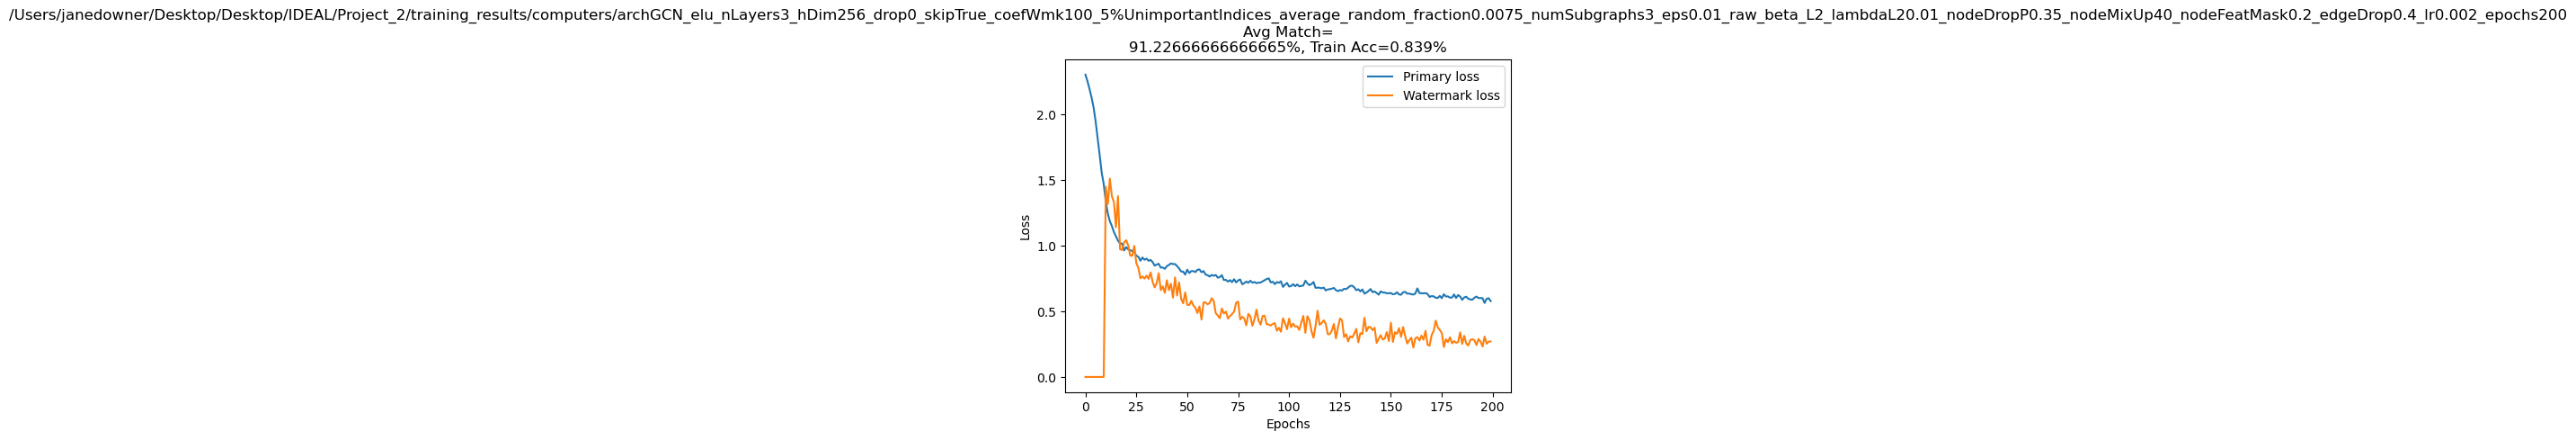



/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue_coefWmk100_5%UnimportantIndices_average_random_fraction0.01_numSubgraphs4_eps0.01_raw_beta_L2_lambdaL20.01_nodeDropP0.35_nodeMixUp40_nodeFeatMask0.2_edgeDrop0.4_lr0.002_epochs200



  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0, loss_primary = 2.300, loss_watermark = n/a, B*W = n/a, train acc = 0.112, val acc = 0.103
Epoch:   1, loss_primary = 2.253, loss_watermark = n/a, B*W = n/a, train acc = 0.490, val acc = 0.460
Epoch:   2, loss_primary = 2.201, loss_watermark = n/a, B*W = n/a, train acc = 0.647, val acc = 0.620
Epoch:   3, loss_primary = 2.138, loss_watermark = n/a, B*W = n/a, train acc = 0.688, val acc = 0.670
Epoch:   4, loss_primary = 2.063, loss_watermark = n/a, B*W = n/a, train acc = 0.705, val acc = 0.686
Epoch:   5, loss_primary = 1.955, loss_watermark = n/a, B*W = n/a, train acc = 0.722, val acc = 0.699
Epoch:   6, loss_primary = 1.868, loss_watermark = n/a, B*W = n/a, train acc = 0.709, val acc = 0.694
Epoch:   7, loss_primary = 1.747, loss_watermark = n/a, B*W = n/a, train acc = 0.719, val acc = 0.687
Epoch:   8, loss_primary = 1.586, loss_watermark = n/a, B*W = n/a, train acc = 0.714, val acc = 0.684
Epoch:   9, loss_primary = 1.500, loss_watermark = n/a, B*W = n/a, train acc = 0.7

In [8]:
all_results = {}


scale_beta_method=None
debug_multiple_subgraphs=True
alpha=1e3
epsilon=0.01

selection_kwargss = [
                    (False, None, 'random'), # random, not individualized
                    (False,'average','unimportant'), # average, not individualized
                    (False,'concat','unimportant'), # concat, not inividualized
                    # (True,None,'unimportant') # unimportant, individualized
                    ]



regularization_kwargs = [(None,None,epsilon,alpha,scale_beta_method),
                         ('L2',0.01,epsilon,alpha,scale_beta_method)]

compare_dict = {}


for selection_kwargs_ in selection_kwargss:
    watermark_kwargs['fancy_selection_kwargs']['evaluate_individually']=selection_kwargs_[0]
    watermark_kwargs['fancy_selection_kwargs']['multi_subg_strategy']=selection_kwargs_[1]
    watermark_kwargs['fancy_selection_kwargs']['selection_strategy']=selection_kwargs_[2]

    for reg_kwargs_ in regularization_kwargs:
        watermark_loss_kwargs['regularization_type'] = reg_kwargs_[0]
        watermark_loss_kwargs['lambda_l2'] = reg_kwargs_[1]
        watermark_loss_kwargs['epsilon']=reg_kwargs_[2]
        watermark_loss_kwargs['alpha']=reg_kwargs_[3]
        watermark_loss_kwargs['scale_beta_method']=reg_kwargs_[4]

        for perc in [5]:#[3,10,50,100]:
            for clf_epochs in [10]:#[5,10,50]:
                for frac in [0.0025]:#[0.001, 0.005, 0.01]:
                    for coef_wmk in [100]:#[0.5,1,2]:
                        for num_subgraphs in [1,2,3,4,5]:
                            if num_subgraphs > 1:
                                frac += 0.0025
                            if watermark_kwargs['watermark_type']=='basic':
                                watermark_kwargs['p_remove']=1-0.01*perc
                            subgraph_kwargs['fraction']=frac
                            subgraph_kwargs['numSubgraphs']=num_subgraphs
                            watermark_kwargs['fancy_selection_kwargs']['percent_of_features_to_watermark']=perc
                            watermark_kwargs['clf_only_epochs']=clf_epochs
                            watermark_kwargs['coefWmk']=coef_wmk
                            name = get_results_folder_name(dataset_name, lr, epochs, node_classifier_kwargs, watermark_kwargs, subgraph_kwargs, augment_kwargs, watermark_loss_kwargs)
                            print(name)
                            print()

                            if dataset_name in ['CORA','CiteSeer','PubMed','Reddit','Flickr','photo','computers']:
                                node_classifier, history, subgraph_dict, all_feature_importances, all_watermark_indices, probas = train(data, 
                                                                                                                                        dataset_name, 
                                                                                                                                        lr, 
                                                                                                                                        epochs, 
                                                                                                                                        node_classifier_kwargs, 
                                                                                                                                        watermark_kwargs, 
                                                                                                                                        subgraph_kwargs, 
                                                                                                                                        augment_kwargs, 
                                                                                                                                     #   epsilon,
                                                                                                                                        #alpha,
                                                                                                                                        #scale_beta_method,
                                                                                                                                        #regularization_type=watermark_loss_kwargs['regularization_type'],
                                                                                                                                        #lambda_l2 =  watermark_loss_kwargs['lambda_l2'],
                                                                                                                                       # augment_subgraphs=False,
                                                                                                                                        watermark_loss_kwargs,
                                                                                                                                        debug_multiple_subgraphs=debug_multiple_subgraphs,
                                                                                                                                        save=True,
                                                                                                                                        )



                            all_loss_curve          = history['losses']
                            primary_loss_curve      = history['losses_primary']
                            watermark_loss_curve    = history['losses_watermark']

                            final_betas = []
                            watermarks = []
                            percent_match = 0
                            for subgraph_sig in subgraph_dict.keys():
                                this_watermark = subgraph_dict[subgraph_sig]['watermark']
                                this_nonzero_indices     = torch.where(this_watermark!=0)[0]
                                watermark_non_zero  = this_watermark[this_nonzero_indices]
                                this_final_beta    = history['betas'][subgraph_sig][-1].clone().detach()
                                this_sign_beta     = torch.sign(this_final_beta[this_nonzero_indices])
                                this_matches = len(torch.where(this_sign_beta==watermark_non_zero)[0])
                                percent_match += np.round(100*this_matches/len(watermark_non_zero),2)
                                final_betas.append(this_final_beta)
                                watermarks.append(this_watermark)
                            percent_match/= len(subgraph_dict)
                            
                            train_acc = np.round(history['train_accs'][-1],3)


                            compare_dict[name]={'loss':all_loss_curve,  'loss_primary':primary_loss_curve,  'loss_watermark':watermark_loss_curve,
                                                'beta':final_betas,      'percent_match':percent_match,      'train acc':train_acc,
                                                'watermark':watermarks}
                            
                            all_results[name] = {}
                            all_results[name]['node_classifier'] = node_classifier
                            all_results[name]['history'] = history
                            all_results[name]['subgraph_dict']=subgraph_dict
                            all_results[name]['all_feature_importances'] = all_feature_importances
                            all_results[name]['all_watermark_indices'] = all_watermark_indices
                            all_results[name]['probas'] = probas
                            print()
                            plt.plot(range(len(primary_loss_curve)), primary_loss_curve, label='Primary loss')
                            plt.plot(range(len(watermark_loss_curve)), [coef_wmk*l for l in watermark_loss_curve], label='Watermark loss')
                            plt.title(name + f'\nAvg Match=\n{percent_match}%, Train Acc={train_acc}%')
                            plt.xlabel('Epochs')
                            plt.ylabel('Loss')
                            plt.legend()
                            plt.show()
                            print()
                            print()

                            everything = [all_results, compare_dict]
                            with open('everything_temp.pkl','wb') as f:
                                pickle.dump(everything,f)



In [ ]:
import itertools
import random
from scipy import stats

random_subgraphs = pickle.load(open(f'{data_dir}/random_subgraphs_{dataset_name}.pkl','rb'))
betas_random_raw__ = []
betas_random__ = []
for (subgraph,node_indices) in random_subgraphs:
    x_sub = subgraph.x
    y_sub = probas[node_indices]
    beta = solve_regression(x_sub, y_sub).clone().detach()
    betas_random_raw__.append(beta)
    beta = torch.sign(beta)
    betas_random__.append(beta)

subgraph_sigs = list(subgraph_dict.keys())
final_betas = torch.stack([torch.sign(history['betas'][k][-1]) for k in subgraph_sigs])


In [119]:
# def create_random_subgraph(data, subgraph_size, mask=None, avoid_nodes=None, verbose=True):
#         num_nodes = data.num_nodes
#         num_selected_nodes = subgraph_size
#         nodes_random_order = torch.randperm(num_nodes)
#         if mask is not None:
#             nodes_random_order = torch.tensor([n.item() for n in nodes_random_order if mask[n.item()] is not False])
#         if avoid_nodes is not None:
#             nodes_random_order = torch.tensor([n.item() for n in nodes_random_order if n not in avoid_nodes])
#         selected_nodes = nodes_random_order[:num_selected_nodes]
#         if verbose==True:
#             print('selected_nodes:',selected_nodes)


#         sub_edge_index, _ = subgraph(selected_nodes, data.edge_index, relabel_nodes=True, num_nodes=num_nodes)
#         sub_data = Data(
#             x=data.x[selected_nodes] if data.x is not None else None,
#             edge_index=sub_edge_index,
#             y=data.y[selected_nodes] if data.y is not None else None,
#             train_mask=data.train_mask[selected_nodes] if data.train_mask is not None else None,
#             test_mask=data.test_mask[selected_nodes] if data.test_mask is not None else None,
#             val_mask=data.val_mask[selected_nodes] if data.val_mask is not None else None,
#         )

#         return sub_data, selected_nodes


# def generate_subgraph(data, dataset_name, kwargs, central_node=None, avoid_nodes=[], use_train_mask=True, max_num_nodes=None, show=True):
#     data = copy.deepcopy(data)
#     numSubgraphs = kwargs['numSubgraphs']
#     fraction      = kwargs['fraction']
        
#     if kwargs['method']=='khop':
#         assert central_node is not None
#         max_degree  = kwargs['khop_kwargs']['max_degree']
#         numHops     = kwargs['khop_kwargs']['numHops']
#         G = to_networkx(data, to_undirected=True)
#         degrees = dict(nx.degree(G))
#         if central_node is None:
#             ranked_node_indices = rank_training_nodes_by_degree(dataset_name, data, max_degree)
#             central_node = ranked_node_indices[0]
#         if dataset_name in ['CORA','CiteSeer','PubMed','Reddit','Reddit2','CS','Flickr','computers','photo']:
#             mask = torch.tensor([True]*len(data.x)) # initially, "mask" blocks nothing
#             if use_train_mask is True:
#                 mask = copy.deepcopy(data.train_mask)
#             if avoid_nodes is not None and len(avoid_nodes)>0:
#                 mask[avoid_nodes] = False
#             subgraph_node_idx = get_masked_subgraph_nodes(data, central_node, hops=numHops, mask=mask)
#             if max_num_nodes is not None:
#                 subgraph_node_idx = torch.tensor(random.sample(subgraph_node_idx.tolist(),max_num_nodes))
#             subgraph_node_idx, subgraph_edge_idx, _, _ = k_hop_subgraph(subgraph_node_idx, 0, edge_index=data.edge_index, num_nodes=data.num_nodes, relabel_nodes=True)
#         elif dataset_name=='PPI':
#             subgraph_node_idx, subgraph_edge_idx, _, _ = k_hop_subgraph(central_node, numHops, edge_index=data.edge_index, num_nodes=data.num_nodes, relabel_nodes=True)
#         data_sub = Data(x=data.x[subgraph_node_idx], edge_index=subgraph_edge_idx, y=data.y[subgraph_node_idx])
#         subgraph_signature = central_node
#     elif kwargs['method']=='random':
#         num_watermarked_nodes = int(fraction*(data.x.shape[0]))
#         subgraph_size = int(num_watermarked_nodes/numSubgraphs)
#         data_sub, subgraph_node_idx = create_random_subgraph(data, subgraph_size, data.train_mask, avoid_nodes)
#         subgraph_signature = '_'.join([str(s) for s in subgraph_node_idx.tolist()])
#     elif kwargs['method']=='random_walk_with_restart':
#         assert central_node is not None
#         restart_prob = kwargs['rwr_kwargs']['restart_prob']
#         max_steps    = kwargs['rwr_kwargs']['max_steps']
#         num_watermarked_nodes = int(fraction*(data.x.shape[0]))
#         subgraph_size = int(num_watermarked_nodes/numSubgraphs)
#         data_sub, subgraph_node_idx = create_rwr_subgraph(data, central_node, restart_prob=restart_prob, subgraph_size=subgraph_size, max_steps=max_steps, mask=data.train_mask, avoid_nodes=avoid_nodes)
#         subgraph_signature = '_'.join([str(s) for s in subgraph_node_idx.tolist()])

#     if show==True:
#         if kwargs['method']=='random':
#             title = f'random {fraction}-fraction subgraph'
#         elif kwargs['method']=='khop':
#             title = f'{numHops}-hop subgraph centered at node {central_node} (degree={degrees[central_node]})'
#         elif kwargs['method']=='random_walk_with_restart':
#             title = f'random walk w/ restart subgraph at node {central_node}, max steps={kwargs["rwr_kwargs"]["max_steps"]} and restart_prob={kwargs["rwr_kwargs"]["restart_prob"]}'
#         G_sub = to_networkx(data_sub, to_undirected=True)
#         plt.figure(figsize=(5, 3))
#         nx.draw_networkx(G_sub, with_labels=False,  node_color = 'blue', node_size=30)
#         plt.title(title)
#         plt.show()

#     return data_sub, subgraph_signature, subgraph_node_idx

# def create_rwr_subgraph(data, start_node, restart_prob=0.15, subgraph_size=50, max_steps=1000, mask=None, avoid_nodes=None):
#     G = to_networkx(data, to_undirected=True)
#     subgraph_nodes = set([start_node])
#     current_node = start_node

#     for _ in range(max_steps):
#         if len(subgraph_nodes) >= subgraph_size:
#             break
#         if random.random() < restart_prob:
#             current_node = start_node
#         else:
#             neighbors = list(G.neighbors(current_node))
#             if neighbors:
#                 current_node = random.choice(neighbors)
#                 if (mask is None or mask[current_node]) and (avoid_nodes is None or current_node not in avoid_nodes):
#                     subgraph_nodes.add(current_node)
#             else:
#                 current_node = start_node

#     subgraph_node_idx = torch.tensor(list(subgraph_nodes))
#     sub_edge_index, _ = subgraph(subgraph_node_idx, data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)
#     sub_data = Data(
#         x=data.x[subgraph_node_idx] if data.x is not None else None,
#         edge_index=sub_edge_index,
#         y=data.y[subgraph_node_idx] if data.y is not None else None,
#         train_mask=data.train_mask[subgraph_node_idx] if data.train_mask is not None else None,
#         test_mask=data.test_mask[subgraph_node_idx] if data.test_mask is not None else None,
#         val_mask=data.val_mask[subgraph_node_idx] if data.val_mask is not None else None,
#     )

#     return sub_data, subgraph_node_idx

# def gather_random_subgraphs_for_testing(data, dataset_name, 
#                                         max_degrees_choices=[20,50,100], 
#                                         frac_choices = [0.001,0.004,0.005,0.01], 
#                                         restart_prob_choices = [0,0.1,0.2], 
#                                         nHops_choices=[1,2,3], 
#                                         limit_khop_num_nodes=False):
#     # create blank subgraph_dict to fill
#     subgraph_kwargs =   {'method': 'random',  
#                          'fraction': None,
#                          'numSubgraphs': 1,
#                                 'khop_kwargs':   {'autoChooseSubGs': True,   'nodeIndices':  None,   'numHops': None,   'max_degree': None},
#                                 'random_kwargs': {},
#                                 'rwr_kwargs': {'restart_prob':None, 'max_steps':1000}
#                             }
    
#     if dataset_name=='computers':
#         max_degrees_choices = [20]

#     use_train_mask=True
#     num_ = 50
#     avoid_indices = []
#     subgraphs = []
#     for i in range(num_):
#         max_num_nodes=None
#         subgraph_kwargs['method'] = np.random.choice(['khop','random','random_walk_with_restart'])
#         fraction = subgraph_kwargs['fraction'] = np.random.choice(frac_choices)

#         print(f'Forming subgraph {i+1} of {num_}: {subgraph_kwargs['method']}',end='\r')
#         if subgraph_kwargs['method']=='khop':
#             if limit_khop_num_nodes==True:
#                 max_num_nodes = int(data.x.shape[0]*fraction)
#             subgraph_kwargs['khop_kwargs']['numHops'] = np.random.choice(nHops_choices)
#             maxDegree = subgraph_kwargs['khop_kwargs']['maxDegree'] = np.random.choice(max_degrees_choices)
#             random.seed(2575)
#             num_watermarked_nodes = int(fraction*len(data.train_mask.tolist()))
#             ranked_nodes = torch.tensor(rank_training_nodes_by_degree(dataset_name, data, max_degree=maxDegree)[:100])
#             idxs = torch.randperm(len(ranked_nodes))
#             ranked_nodes = ranked_nodes[idxs]
#             node_indices_to_watermark = ranked_nodes[:num_watermarked_nodes]
#             central_node = node_indices_to_watermark[0]
#         elif subgraph_kwargs['method']=='random_walk_with_restart':
#             max_num_nodes = int(data.x.shape[0]*fraction)
#             subgraph_kwargs['rwr_kwargs']['restart_prob'] = np.random.choice(restart_prob_choices)
#             ranked_nodes = torch.tensor(rank_training_nodes_by_degree(dataset_name, data, max_degree=maxDegree)[:100])
#             idxs = torch.randperm(len(ranked_nodes))
#             ranked_nodes = ranked_nodes[idxs]
#             node_indices_to_watermark = ranked_nodes[:num_watermarked_nodes]
#             central_node = node_indices_to_watermark[0]
#         elif subgraph_kwargs['method']=='random':
#             central_node=None


#         data_sub, _, subgraph_node_indices = generate_subgraph(data, dataset_name, subgraph_kwargs, central_node, avoid_indices, use_train_mask, max_num_nodes=max_num_nodes, show=False)
#         subgraphs.append((data_sub,subgraph_node_indices))
#         try:
#             avoid_indices += [node_index.item() for node_index in subgraph_node_indices]
#         except:
#             avoid_indices += [node_index.item() for node_index in subgraph_node_indices]

#     return subgraphs

random_subgraphs = gather_random_subgraphs_for_testing(data, dataset_name, max_degrees_choices=[20,50,100], frac_choices = [0.0025], nHops_choices=[2], limit_khop_num_nodes=True)


selected_nodes: tensor([12416, 11862,  3478,  3627, 11935,   820, 10365,  3758,  6146,  8676,
         8574,  4233,  6288,  1219,  7123,  2824,  5068,  4405, 11506,  9646,
          499,  4770,  2670, 11599, 12452, 10716,  1400,  1084,  9351,  9106,
         6072, 13522,   648,  5745])
selected_nodes: tensor([ 7838, 12312,  7232, 13536,   451,  8020,  7152,  8458,  2099,  1987,
        13540,  6725,  1895,  7527, 13234,  2825,  6519, 11242,  3861,   906,
         6510,  1139,  7681,  4718, 12925,  6499,  5582,  9639,  3425, 11775,
        13558,  6054, 13373,  4516])
subgraph_node_idx: tensor([    1,     2,     3,  ..., 13734, 13738, 13745])
max_num_nodes: 34
selected_nodes: tensor([  386,  7016,  8027, 13502, 12867,  8439, 13152,  3745, 10343,  6389,
         6183,  2232,  7835,  2123,  5264,  6113,  8147,  1416,  8397, 12408,
         1915,  8544,  9274,  8110, 11941, 12256,  3392,   363, 12038, 11525,
         7064,  4752, 10023,  8369])
selected_nodes: tensor([12745,  5696, 12236, 

In [126]:
random_subgraphs_34 = pickle.load(open(f'{data_dir}/random_subgraphs_{dataset_name}_size_34.pkl','rb'))
random_subgraphs_varied = pickle.load(open(f'{data_dir}/random_subgraphs_{dataset_name}_size_varied.pkl','rb'))



In [124]:
test_value = count_matches(final_betas)

n = len(subgraph_dict)
sample_size = 1000
means = []
stds = []
match_counts_lists = []
print(f'Computing # matches in groups of {n} beta tensors...')

''' random subgraphs '''
n_tuplets = list(itertools.combinations(range(len(random_subgraphs)), n))
n_tuplets = random.sample(n_tuplets, sample_size)
match_counts = []
for i in range(len(n_tuplets)):
    print(f'{i}/{len(n_tuplets)}',end='\r')
    bs = torch.vstack([betas_random__[j] for j in n_tuplets[i]])
    match_counts.append(count_matches(bs))
sample_mean = np.mean(match_counts)
sample_std = np.std(match_counts, ddof=1)   

print()
print(f'Empirical Sample Mean, Std: {np.round(sample_mean,3)}, {np.round(sample_std,3)}')
print(f'# Matches among the {n} watermarked betas: {test_value}')
print()
t_score = (test_value - sample_mean)/(sample_std/(np.sqrt(sample_size)))
p_value = 1 - stats.t.cdf(t_score, df=sample_size-1)
print(f't_score = {np.round(t_score,3)}, p-value = {np.round(p_value,5)}')

Computing # matches in groups of 5 beta tensors...
999/1000
Empirical Sample Mean, Std: 25.401, 27.539
# Matches among the 5 watermarked betas: 78

t_score = 60.399, p-value = 0.0


In [ ]:
with open

In [121]:

sizes=[]
for i in range(len(random_subgraphs)):
    size = random_subgraphs[i][0].x.shape[0]
    sizes.append(size)
np.mean(sizes)

31.36

In [123]:
np.mean([len(subgraph_dict[k]['nodeIndices']) for k in subgraph_sigs])

34.0

In [ ]:
test_value = count_matches(bs)
                 
print()
print(f'Population Mean, Std: {np.round(sample_mean,3)}, Empirical Std: {np.round(sample_std,3)}')
print(f'# Matches among the {n} watermarked betas: {test_value}')
print()
t_score = (test_value - sample_mean)/(sample_std/(np.sqrt(sample_size)))
p_value = 1 - stats.t.cdf(t_score, df=sample_size-1)
print(f't_score = {np.round(t_score,3)}, p-value = {np.round(p_value,5)}')

tensor([-1.0000e-04, -1.0000e-03, -1.0000e-01,  2.0000e-03])
tensor([0.9999, 0.9990, 0.9000, 1.0020])
tensor([0.9999, 0.9990, 0.9000, 1.0020])
tensor([-1.0000e-04, -1.0000e-03, -1.0000e-01,  2.0000e-03])


In [ ]:
6.01/20.489

0.29332812728781293

In [ ]:
35.54/13752

0.00258435136707388

In [ ]:
sizes=[]
for i in range(len(random_subgraphs)):
    size = random_subgraphs[i][0].x.shape[0]
    sizes.append(size)
np.mean(sizes)

35.54

In [ ]:
for sig in subgraph_dict.keys():
    this_watermark, data_sub, subgraph_node_indices = [subgraph_dict[sig][k] for k in ['watermark','subgraph','nodeIndices']]
    x_sub, y_sub = data_sub.x, probas[subgraph_node_indices]
    # if torch.sum(torch.sum(x_sub)).item()==1:
    print(x_sub.shape, torch.sum(x_sub), all_degrees[sig])

torch.Size([39, 767]) tensor(39.0000) 50
torch.Size([30, 767]) tensor(30.) 50
torch.Size([27, 767]) tensor(27.) 50
torch.Size([32, 767]) tensor(32.) 50
torch.Size([24, 767]) tensor(24.) 50
torch.Size([27, 767]) tensor(27.0000) 50
torch.Size([26, 767]) tensor(26.) 50
torch.Size([31, 767]) tensor(31.) 50
torch.Size([33, 767]) tensor(33.0000) 50
torch.Size([20, 767]) tensor(20.) 50
torch.Size([31, 767]) tensor(31.) 50
torch.Size([31, 767]) tensor(31.) 50
torch.Size([1, 767]) tensor(1.) 50
torch.Size([22, 767]) tensor(22.) 50
torch.Size([30, 767]) tensor(30.0000) 50
torch.Size([11, 767]) tensor(11.) 50
torch.Size([19, 767]) tensor(19.0000) 50
torch.Size([25, 767]) tensor(25.) 50


In [ ]:
G = to_networkx(graph_to_watermark, to_undirected=True)
all_degrees = dict(nx.degree(G))
all_degrees[6199]

50

In [ ]:
beta_similarities_dict = history['beta_similarities']


import networkx as nx
import torch
import numpy as np
import pandas as pd
from torch_geometric.utils import to_networkx

def compute_subgraph_properties(data, subgraph_indices):
    G = to_networkx(data, to_undirected=True)
    subgraph = G.subgraph(subgraph_indices.tolist())
    
    if len(subgraph) == 0 or len(subgraph.edges()) == 0:
        avg_degree = 0
        clustering_coefficient = 0
        eigenvector_centrality = 0
    else:
        avg_degree = np.mean([d for n, d in subgraph.degree()])
        clustering_coefficient = nx.average_clustering(subgraph)
        eigenvector_centrality = np.mean(list(nx.eigenvector_centrality_numpy(subgraph).values()))
    
    return avg_degree, clustering_coefficient, eigenvector_centrality

def correlate_properties_with_similarity(data, subgraph_dict, beta_similarities_dict):
    properties = []
    similarities = []
    for sig in subgraph_dict.keys():
        subgraph_indices = subgraph_dict[sig]['nodeIndices']
        avg_degree, clustering_coefficient, eigenvector_centrality = compute_subgraph_properties(data, subgraph_indices)
        properties.append([avg_degree, clustering_coefficient, eigenvector_centrality])
        similarities.append(beta_similarities_dict[sig].item())
    
    df = pd.DataFrame(properties, columns=['Avg_Degree', 'Clustering_Coefficient', 'Eigenvector_Centrality'])
    df['Beta_Similarity'] = similarities
    
    # Replace NaN values with 0
    df.fillna(0, inplace=True)
    
    correlation_matrix = df.corr(method='spearman')  # or 'kendall'
    print(correlation_matrix)

# Example usage
correlate_properties_with_similarity(data, subgraph_dict, beta_similarities_dict)

                        Avg_Degree  Clustering_Coefficient  \
Avg_Degree                1.000000               -0.103030   
Clustering_Coefficient   -0.103030                1.000000   
Eigenvector_Centrality   -0.539394                0.321212   
Beta_Similarity           0.127273               -0.381818   

                        Eigenvector_Centrality  Beta_Similarity  
Avg_Degree                           -0.539394         0.127273  
Clustering_Coefficient                0.321212        -0.381818  
Eigenvector_Centrality                1.000000        -0.369697  
Beta_Similarity                      -0.369697         1.000000  


In [ ]:
num_edges, vars = [],[]
for sig in subgraph_dict:
    subgraph = subgraph_dict[sig]['subgraph']
    num_edges.append(subgraph.edge_index.shape[1])
    internode_var = torch.var(subgraph.x,dim=0)
    internode_var = torch.sum(internode_var)
    vars.append(internode_var)

num_edges = torch.tensor(num_edges)
vars = torch.tensor(vars)

def check_size_and_density(subgraph_data):
    num_nodes = subgraph_data.num_nodes
    num_edges = subgraph_data.num_edges
    density = num_edges / (num_nodes * (num_nodes - 1) / 2)
    return density

# Example usage
densities = []
for sig in subgraph_dict.keys():
    subgraph_data = subgraph_dict[sig]['subgraph']
    density = check_size_and_density(subgraph_data)
    densities.append(density)
densities = torch.tensor(densities)

def examine_centrality(data, subgraph_dict):
    G_ = to_networkx(data, to_undirected=True)
    degrees = dict(nx.degree(G_))
    all_avg_degrees = []
    for sig in subgraph_dict.keys():
        nodeIndices = subgraph_dict[sig]['nodeIndices']
        degrees_ = [degrees[idx.item()] for idx in nodeIndices]
        avg_degree = np.mean(degrees_)
        all_avg_degrees.append(avg_degree)

    return all_avg_degrees

# Example usage
centralities = torch.tensor(examine_centrality(data, subgraph_dict))

print(torch.argsort(num_edges))
print(torch.argsort(vars))
print(torch.argsort(densities))
print(torch.argsort(centralities))


tensor([0, 2, 7, 5, 4, 6, 1, 8, 9, 3])
tensor([7, 9, 0, 8, 3, 6, 1, 5, 4, 2])
tensor([0, 2, 7, 5, 4, 6, 1, 8, 9, 3])
tensor([0, 5, 8, 2, 4, 6, 1, 9, 7, 3])


In [ ]:
import pandas as pd

beta_similarities_dict = history['beta_similarities']

def visualize_subgraph_with_original_indices(data, subgraph_indices):
    subgraph = data.subgraph(subgraph_indices)
    G_sub = to_networkx(subgraph, to_undirected=True)
    plt.figure(figsize=(5, 3))
    nx.draw_networkx(G_sub, with_labels=True, node_color='blue', node_size=30)
    plt.show()

def analyze_features_with_original_indices(data, subgraph_indices):
    node_features = data.x[subgraph_indices]
    subgraph_indices_set = set(subgraph_indices.tolist())
    mask = torch.tensor([(src in subgraph_indices_set and dst in subgraph_indices_set) for src, dst in data.edge_index.T.tolist()])
    edge_indices = data.edge_index[:, mask]
    print(f'Node Features: {node_features}')
    print(f'Edge Indices: {edge_indices}')

def check_size_and_density_with_original_indices(data, subgraph_indices):
    num_nodes = len(subgraph_indices)
    subgraph_indices_set = set(subgraph_indices.tolist())
    mask = torch.tensor([(src in subgraph_indices_set and dst in subgraph_indices_set) for src, dst in data.edge_index.T.tolist()])
    num_edges = torch.sum(mask).item()
    density = num_edges / (num_nodes * (num_nodes - 1) / 2) if num_nodes > 1 else 0
    print(f'Number of Nodes: {num_nodes}, Number of Edges: {num_edges}, Density: {density}')

def examine_centrality_with_original_indices(data, subgraph_indices):
    G = to_networkx(data, to_undirected=True)
    centrality = nx.degree_centrality(G)
    subgraph_centrality = {node: centrality[node] for node in subgraph_indices.tolist()}
    print(f'Node Centrality: {subgraph_centrality}')

def investigate_feature_distribution_with_original_indices(data, subgraph_indices):
    node_features = data.x[subgraph_indices]
    feature_means = torch.mean(node_features, dim=0)
    feature_stddevs = torch.std(node_features, dim=0)
    print(f'Feature Means: {feature_means}')
    print(f'Feature Standard Deviations: {feature_stddevs}')

def compute_subgraph_properties_with_original_indices(data, subgraph_indices):
    G = to_networkx(data, to_undirected=True)
    subgraph = G.subgraph(subgraph_indices.tolist())
    if len(subgraph) == 0 or len(subgraph.edges()) == 0:
        avg_degree = 0
        clustering_coefficient = 0
        eigenvector_centrality = 0
    else:
        avg_degree = np.mean([d for n, d in subgraph.degree()])
        clustering_coefficient = nx.average_clustering(subgraph)
        eigenvector_centrality = np.mean(list(nx.eigenvector_centrality_numpy(subgraph).values()))
    return avg_degree, clustering_coefficient, eigenvector_centrality

def correlate_properties_with_similarity(data, subgraph_dict, beta_similarities_dict):
    properties = []
    similarities = []
    for sig in subgraph_dict.keys():
        subgraph_indices = subgraph_dict[sig]['nodeIndices']
        avg_degree, clustering_coefficient, eigenvector_centrality = compute_subgraph_properties_with_original_indices(data, subgraph_indices)
        
        properties.append([avg_degree, clustering_coefficient, eigenvector_centrality])
        similarities.append(beta_similarities_dict[sig].item())
    
    df = pd.DataFrame(properties, columns=['Avg_Degree', 'Clustering_Coefficient', 'Eigenvector_Centrality'])
    df['Beta_Similarity'] = similarities
    
    # Replace NaN values with 0 or use another strategy to handle NaNs
    df.fillna(0, inplace=True)
    
    correlation_matrix = df.corr(method='spearman')  # or 'kendall'
    print(correlation_matrix)


# # Example usage
# for sig in subgraph_dict.keys():
#     subgraph_indices = subgraph_dict[sig]['nodeIndices']
#     visualize_subgraph_with_original_indices(data, subgraph_indices)
#     analyze_features_with_original_indices(data, subgraph_indices)
#     check_size_and_density_with_original_indices(data, subgraph_indices)
#     examine_centrality_with_original_indices(data, subgraph_indices)
#     investigate_feature_distribution_with_original_indices(data, subgraph_indices)

# # Example usage
# correlate_properties_with_similarity(data, subgraph_dict, beta_similarities_dict)

In [ ]:
subgraph.edge_index

tensor([[13, 40, 19, 38],
        [38, 19, 40, 13]])

## Many options, compared:

In [ ]:
compare_dict = None

get_coef_wmk    = lambda name: float(name.split(' ')[1].split('=')[-1][:-1])
get_percentile  = lambda name: int(name.split(' ')[4].split('-')[0])
get_frac        = lambda name: float(name.split(' ')[7].split('=')[-1][:-1])
get_clf_epochs  = lambda name: int(name.split(' ')[-2])

sorted_keys = dict(sorted(compare_dict.items(), key=lambda item: np.mean([item[1]['percent_match'],100*item[1]['train acc']]))).keys()
for k in sorted_keys:
    print(k)
    print('match:',compare_dict[k]['percent_match'],'acc:',compare_dict[k]['train acc'].item())
    print()

#b = compare_dict_subgraph_unimportant[list(sorted_keys)[-1]]['beta']
##w = compare_dict_subgraph_unimportant[list(sorted_keys)[-1]]['watermark']
#torch.sum(b*w)
best_coef_wmk = get_coef_wmk(list(sorted_keys)[-1])
best_perc = get_percentile(list(sorted_keys)[-1])
best_frac = get_frac(list(sorted_keys)[-1])
best_clf_ep = get_clf_epochs(list(sorted_keys)[-1])

## Best current option -- full training

RESULTS


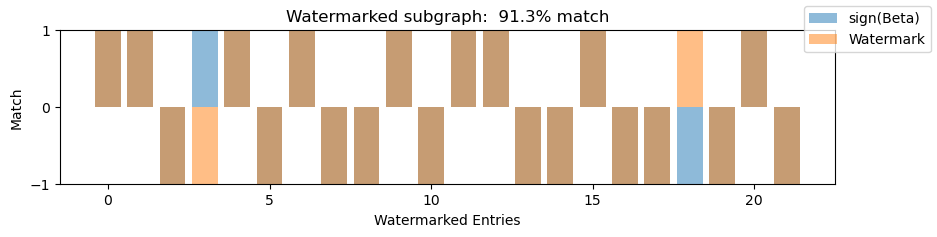

COMPARISON AGAINST RANDOM SUBGRAPHS


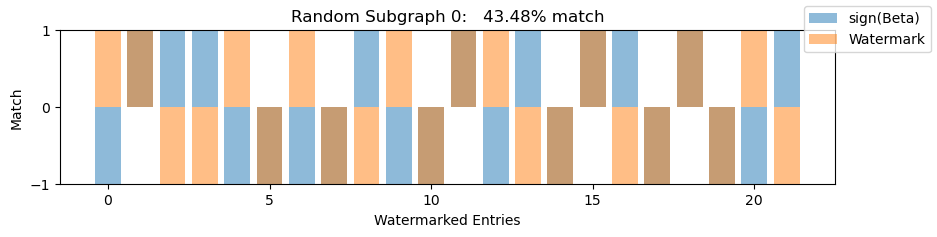

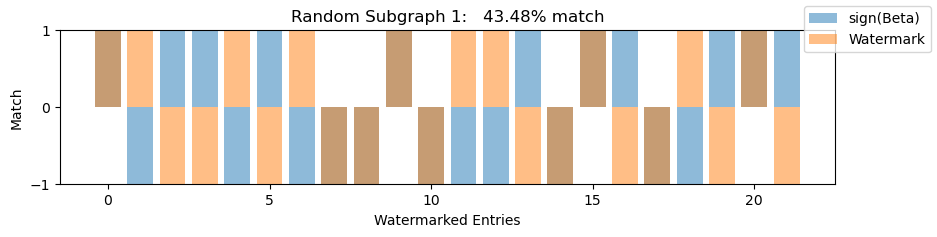

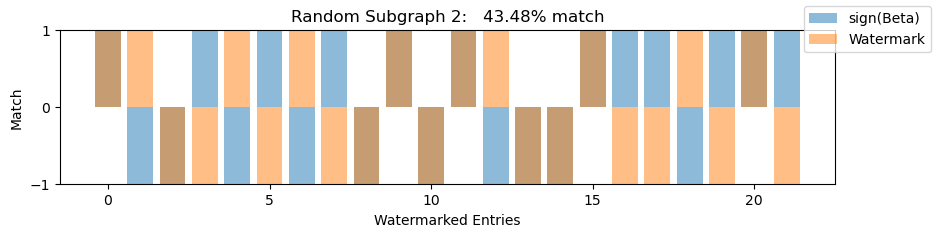

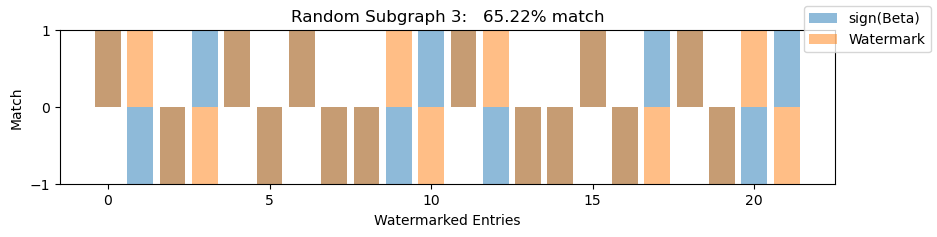

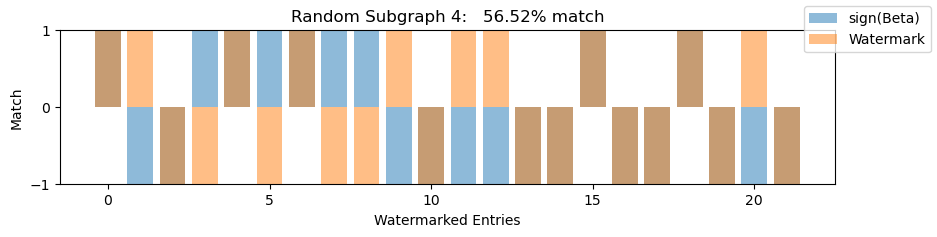

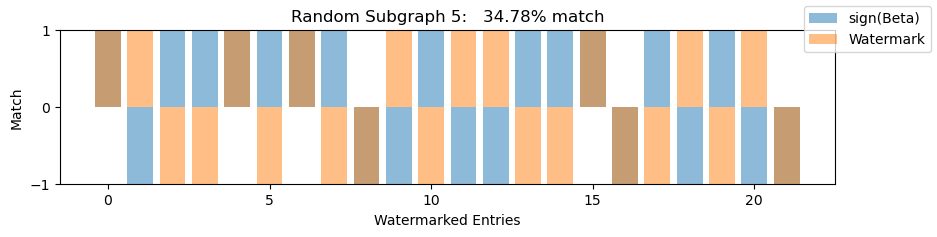

In [ ]:
watermark_kwargs['unimportant_percentile']=best_perc
watermark_kwargs['clf_only_epochs']=best_clf_ep
subgraph_kwargs['random_kwargs']['fraction']=best_frac
watermark_kwargs['coefWmk']=best_coef_wmk
compare_unimportant_against_random=False
be



if dataset_name in ['CORA','CiteSeer','PubMed','Reddit','Flickr','photo','computers']:
    node_classifier, history, subgraph_dict, all_feature_importances, all_watermark_indices, probas = train(data, dataset_name, lr, epochs, 
                                                                                                            node_classifier_kwargs, watermark_kwargs, 
                                                                                                            subgraph_kwargs, densify_kwargs, augment_kwargs, save=True)

##

beta_dict = history['betas']
subgraph_sig = list(beta_dict.keys())[0]
nonzero_indices = torch.where(watermark!=0)[0]
watermark_non_zero = watermark[nonzero_indices]

start   = watermark_kwargs['clf_only_epochs']
end     = len(beta_dict[list(beta_dict.keys())[0]])
# n = -1
print('RESULTS')
fig, ax = plt.subplots(1, 1,figsize=(10,2))
beta    = beta_dict[subgraph_sig ][-1].clone().detach()
sign_beta = torch.sign(beta[nonzero_indices])
matches = len(torch.where(sign_beta==watermark_non_zero)[0])
percent_match = np.round(100*matches/len(watermark_non_zero),2)

ax.bar(range(len(sign_beta[:n])),           sign_beta[:n].numpy(),          label='sign(Beta)', alpha=0.5)
ax.bar(range(len(watermark_non_zero[:n])),  watermark_non_zero[:n].numpy(), label='Watermark',  alpha=0.5)
ax.set_title(f'Watermarked subgraph:  {percent_match}% match')
ax.set_xlabel('Watermarked Entries')
ax.set_ylabel('Match')
ax.set_ylim(-1,1)
ax.set_yticks([-1,0,1])
fig.legend()
plt.show()

print('COMPARISON AGAINST RANDOM SUBGRAPHS')
numSubgraphs=6
alpha=1e3
random_betas_dict, random_beta_similarities_dict = extract_results_random_subgraphs(data, dataset_name, best_frac*numSubgraphs, numSubgraphs, alpha, watermark, probas, node_classifier, subgraph_kwargs, use_train_mask=False)
keys = random_betas_dict.keys()
for i, subgraph_sig in enumerate(keys):
    # print(random_beta_similarities_dict[k].item())

    fig, ax = plt.subplots(1, 1,figsize=(10,2))
    beta    = random_betas_dict[subgraph_sig][-1].clone().detach()
    sign_beta = torch.sign(beta[nonzero_indices])
    bw = np.round(random_beta_similarities_dict[subgraph_sig].item(),2)
    matches = len(torch.where(sign_beta==watermark_non_zero)[0])
    percent_match = np.round(100*matches/len(watermark_non_zero),2)

    ax.bar(range(len(sign_beta[:n])),           sign_beta[:n].numpy(),          label='sign(Beta)', alpha=0.5)
    ax.bar(range(len(watermark_non_zero[:n])),  watermark_non_zero[:n].numpy(), label='Watermark',  alpha=0.5)
    ax.set_title(f'Random Subgraph {i}:   {percent_match}% match')
    ax.set_xlabel('Watermarked Entries')
    ax.set_ylabel('Match')
    ax.set_ylim(-1,1)
    ax.set_yticks([-1,0,1])
    fig.legend()
plt.show()

## GRID SEARCH

In [ ]:
all_indices

[tensor([652, 512, 118, 263, 632, 537, 259, 103, 668, 358, 318, 465, 114, 699,
         644, 608, 294, 129, 175,  13, 295,  64, 208]),
 tensor([471, 213, 561, 208, 201, 541, 684, 191, 219, 732, 128, 239, 642, 155,
          82, 287, 171, 304, 350, 690,  71, 198, 529]),
 tensor([558, 234, 635, 494, 291, 562, 372,  55, 468, 256, 355, 356,  18, 482,
         594, 236, 581, 502, 359, 616,  78,  62, 221]),
 tensor([441, 278, 164, 691, 621, 675, 220, 197, 662,  89, 458, 196, 221, 328,
         620, 144, 327, 219, 223, 201, 665, 744,  79]),
 tensor([323, 148, 595, 469, 515, 555,  66, 127, 485, 278, 297, 567,  64, 126,
         274, 635, 378, 527, 585, 561,  52, 298,  40]),
 tensor([  9, 683, 573, 354, 300, 223, 706, 541, 437, 131, 466, 636,  49, 537,
         360, 363, 405, 173, 411, 692, 369, 389, 656]),
 tensor([184, 297, 463, 363, 670, 150, 116, 678, 285, 489, 423, 252, 138,  48,
         541, 329, 412, 303,   1, 502,  79, 277, 380]),
 tensor([ 88, 508, 108,  93, 666, 258, 459, 448, 514, 5

In [ ]:
concat_indices

tensor([ 74, 195, 499, 463, 170,  83, 355, 399, 454, 160, 458, 724, 320, 500,
        449, 119, 513,  23,  89, 557, 484, 223, 175])

In [ ]:
# all_indices
indices

tensor([439,  12, 445,  99, 215,  78, 180, 482, 634, 130, 639, 570, 485, 141,
        726, 447, 133, 374, 320, 376,  72, 658, 575])

In [ ]:
torch.topk(1/torch.tensor(list(beta_all_sub.abs())),23)

torch.return_types.topk(
values=tensor([98647.6562, 44980.4492, 44899.4648, 33666.1836, 27683.6250, 21407.2246,
        18521.9434, 16209.3447, 15895.3760, 13966.3486, 12648.3975, 11209.0244,
        11182.5625,  9724.1611,  9129.8594,  9015.8457,  7754.1909,  7356.2476,
         6480.4902,  5922.4180,  5750.9590,  5521.0752,  4625.4204]),
indices=tensor([ 74, 195, 499, 463, 170,  83, 355, 399, 454, 160, 458, 724, 320, 500,
        449, 119, 513,  23,  89, 557, 484, 223, 175]))

In [ ]:
subgraph_key = list(history['betas'].keys())[0]
beta = history['betas'][subgraph_key][-1].clone().detach()
nonzeros=torch.where(watermark!=0)[0]
print(len(torch.where(torch.sign(beta[nonzeros])==watermark[nonzeros])[0])/len(nonzeros))

0.8260869565217391


RESULTS


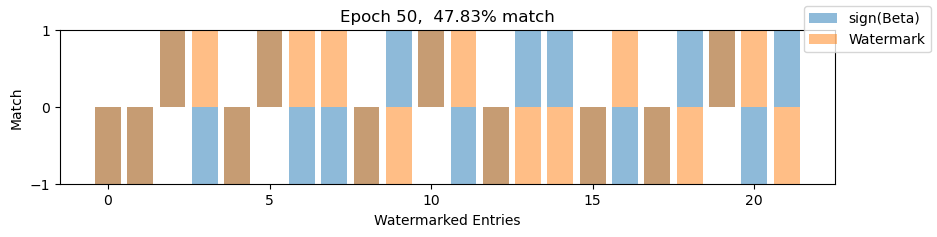

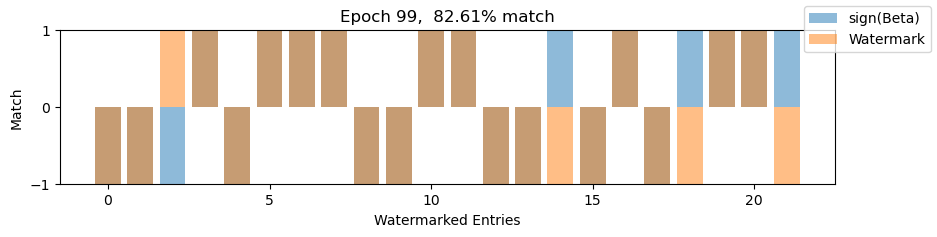

COMPARISON AGAINST RANDOM SUBGRAPHS


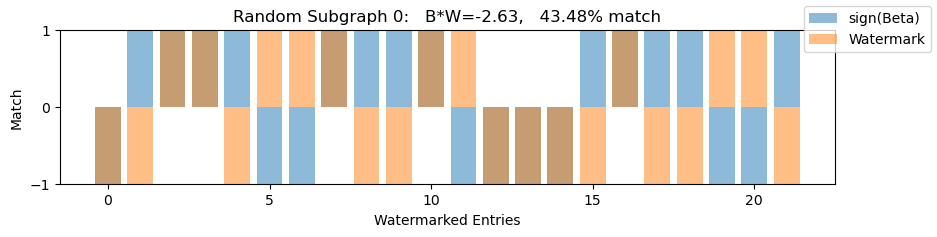

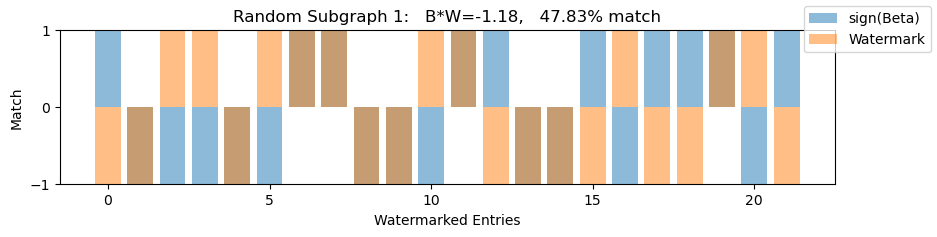

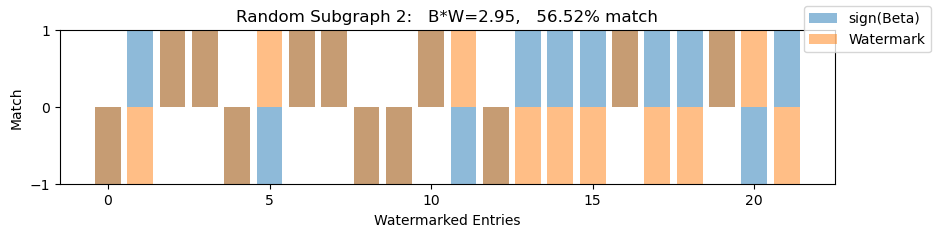

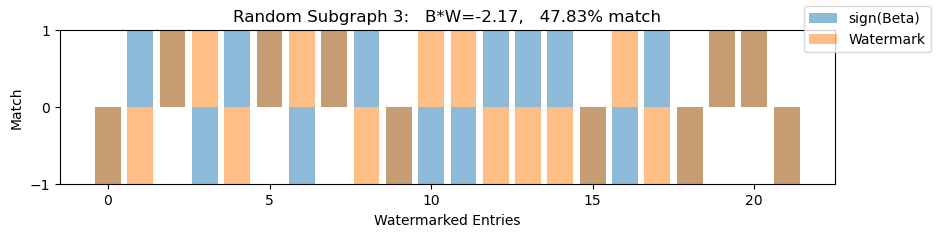

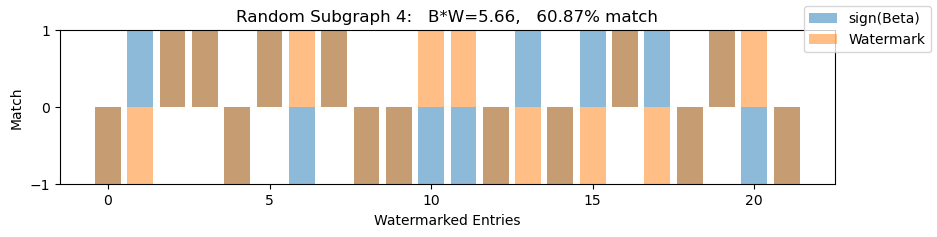

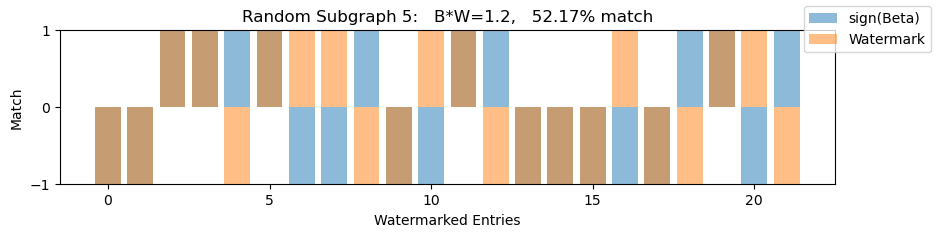

In [ ]:
beta_dict = history['betas']
subgraph_sig = list(beta_dict.keys())[0]
nonzero_indices = torch.where(watermark!=0)[0]
watermark_non_zero = watermark[nonzero_indices]

start   = watermark_kwargs['clf_only_epochs']
end     = len(beta_dict[list(beta_dict.keys())[0]])
n = -1
print('RESULTS')
for i in [0,-1]:
    fig, ax = plt.subplots(1, 1,figsize=(10,2))
    beta    = beta_dict[subgraph_sig ][i].clone().detach()
    sign_beta = torch.sign(beta[nonzero_indices])
    matches = len(torch.where(sign_beta==watermark_non_zero)[0])
    percent_match = np.round(100*matches/len(watermark_non_zero),2)

    ax.bar(range(len(sign_beta[:n])),           sign_beta[:n].numpy(),          label='sign(Beta)', alpha=0.5)
    ax.bar(range(len(watermark_non_zero[:n])),  watermark_non_zero[:n].numpy(), label='Watermark',  alpha=0.5)
    ax.set_title(f'Epoch {start+i if i>=0 else start+end+i},  {percent_match}% match')
    ax.set_xlabel('Watermarked Entries')
    ax.set_ylabel('Match')
    ax.set_ylim(-1,1)
    ax.set_yticks([-1,0,1])
    fig.legend()
plt.show()

print('COMPARISON AGAINST RANDOM SUBGRAPHS')
numSubgraphs=6
alpha=1e3
random_betas_dict, random_beta_similarities_dict = extract_results_random_subgraphs(data, dataset_name, frac*numSubgraphs, numSubgraphs, alpha, watermark, probas, node_classifier, subgraph_kwargs, use_train_mask=False)
keys = random_betas_dict.keys()
for i, subgraph_sig in enumerate(keys):
    # print(random_beta_similarities_dict[k].item())

    fig, ax = plt.subplots(1, 1,figsize=(10,2))
    beta    = random_betas_dict[subgraph_sig][-1].clone().detach()
    sign_beta = torch.sign(beta[nonzero_indices])
    bw = np.round(random_beta_similarities_dict[subgraph_sig].item(),2)
    matches = len(torch.where(sign_beta==watermark_non_zero)[0])
    percent_match = np.round(100*matches/len(watermark_non_zero),2)

    ax.bar(range(len(sign_beta[:n])),           sign_beta[:n].numpy(),          label='sign(Beta)', alpha=0.5)
    ax.bar(range(len(watermark_non_zero[:n])),  watermark_non_zero[:n].numpy(), label='Watermark',  alpha=0.5)
    ax.set_title(f'Random Subgraph {i}:   B*W={bw},   {percent_match}% match')
    ax.set_xlabel('Watermarked Entries')
    ax.set_ylabel('Match')
    ax.set_ylim(-1,1)
    ax.set_yticks([-1,0,1])
    fig.legend()
plt.show()

In [ ]:
frac

0.01

enumerate_over_me: range(0, 6)
selected_nodes: tensor([ 8747, 12935, 12177, 12519,  7722,  4230,  5127,  1505,  7187,  6807,
         9523,  7935, 11761,  2432,  6416, 10512,  5268, 10687,  9013, 11458,
         2255,  4606, 12601,  4702,   936,  2972,  7875, 12350,  7803,  2597,
          503,    12,   668, 13689,    54,  9173, 11528, 11268,  2709,  5033,
         8393,   579,  9731,    16, 12451,  4746,  4185, 12754,  2514,  2195,
         5652, 11280,  5067,  9922, 12650,  9828, 12164,  1002,  5779, 10967,
          638,  1885, 11435,  3845,  2009,  7595,  8390,  9503, 13127, 10851,
          617, 12282,  3427,  2820, 11258,  3385,  3304,  6972, 11033,  9626,
         6560,  8208,  3737,  7920, 10123,  9241, 10873,  4484,  9964,  6703,
         4226,  6268,  8075,  8748, 11277,   825, 10831,  9115,  3096,  4288,
        11230, 12720,  8165,  3330,  6145,  7101,  9244,  7832,  8674,  6187,
         8323,  9259,  6877, 13730,  3952,  5889,   624,  2349,  9094,  8215,
        13114,  8

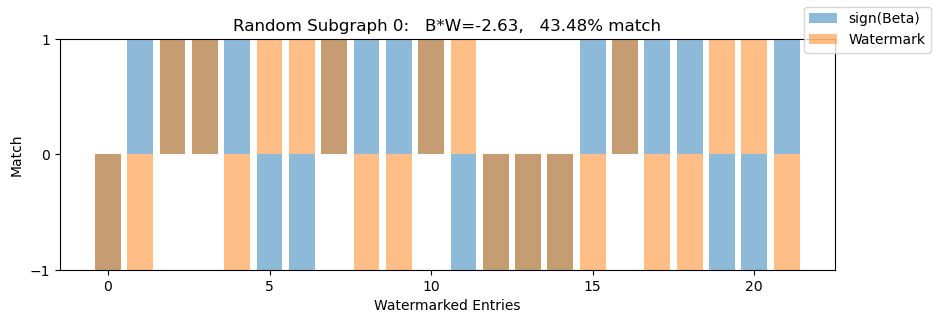

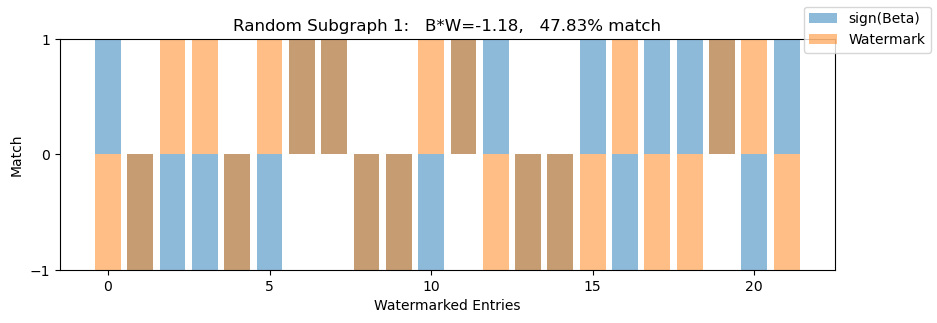

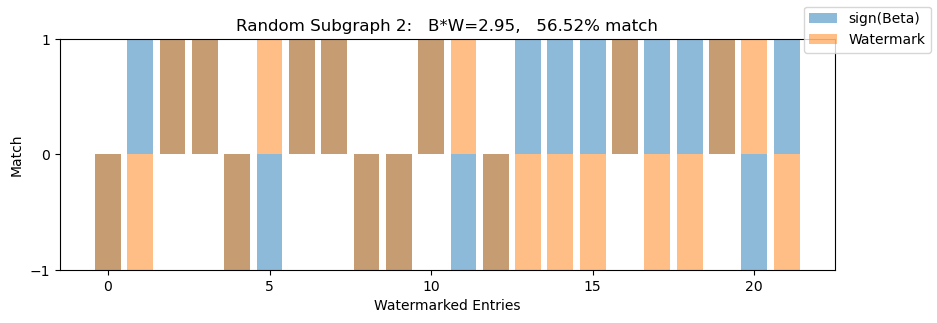

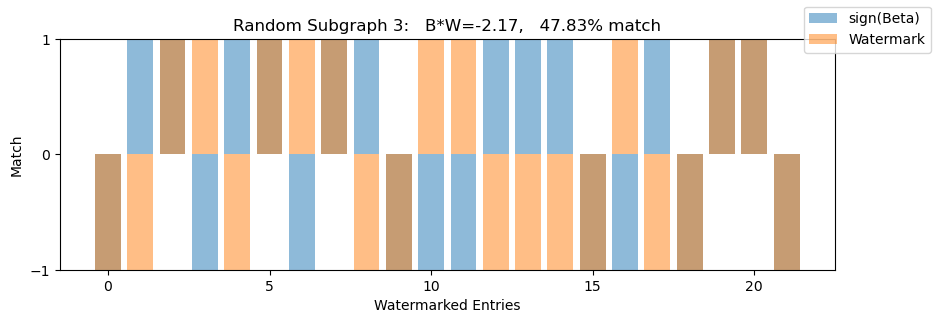

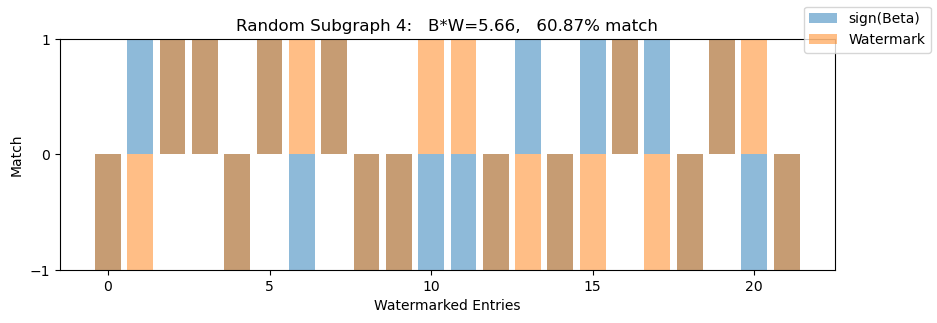

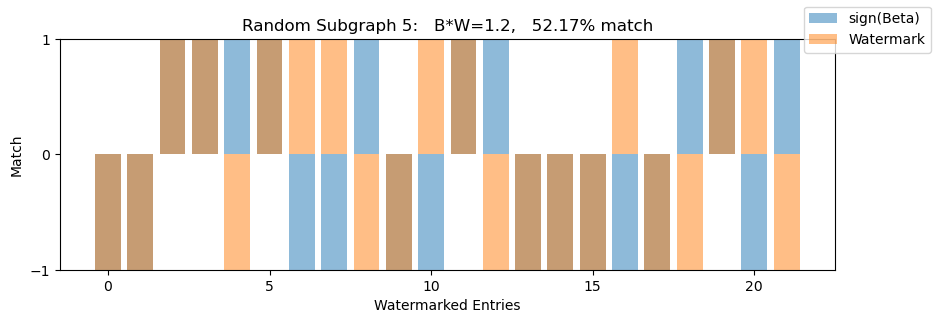

In [ ]:
random_betas_dict

dict_values([tensor(-1.5490, grad_fn=<SumBackward0>), tensor(1.9462, grad_fn=<SumBackward0>), tensor(2.9998, grad_fn=<SumBackward0>), tensor(-0.9422, grad_fn=<SumBackward0>), tensor(0.0271, grad_fn=<SumBackward0>)])

In [ ]:
def get_masked_subgraph_nodes(data, central_node, hops=2, mask=None, handle_small_subgraphs='accept'):
    ''' 
    In some graphs, nodes are split train/val/test. This extracts the 
    subgraph nodes belonging to a certain subset, and *then* handing this
    these nodes to k_hop_subgraph to construct the result.
    '''
    seen_nodes = set()
    nodes_to_explore = set([central_node])
    subgraph_edge_list = []

    for hop in range(hops):
        nodes_added_this_hop=False
        nodes_to_explore_temp = set()  
        for this_central_node in nodes_to_explore:
            if this_central_node not in seen_nodes:
                seen_nodes.add(this_central_node)
                this_edge_index = get_1_hop_edge_index(data, this_central_node, mask=mask)
                for [n0, n1] in this_edge_index.T.tolist():
                    if [n0, n1] not in subgraph_edge_list and [n1, n0] not in subgraph_edge_list:
                        subgraph_edge_list.append([n0, n1])
                    if n0 != this_central_node and n0 not in seen_nodes:
                        nodes_added_this_hop=True
                        nodes_to_explore_temp.add(n0)
                    if n1 != this_central_node and n1 not in seen_nodes:
                        nodes_added_this_hop=True
                        nodes_to_explore_temp.add(n1)
        nodes_to_explore = nodes_to_explore.union(nodes_to_explore_temp)
        if nodes_added_this_hop==False:
            if handle_small_subgraphs=='skip':
                return None
            elif handle_small_subgraphs=='accept':
                break

    subgraph_edge_index = torch.tensor(subgraph_edge_list).T
    if hops==0 or len(subgraph_edge_list)==0:
        original_node_ids = torch.concat([torch.unique(subgraph_edge_index),torch.tensor([central_node])]).int()
    else:
        original_node_ids = torch.unique(subgraph_edge_index)
    original_node_ids, _ = torch.sort(original_node_ids)
    return original_node_ids

def generate_subgraph(data, dataset_name, node_index_to_watermark=None, subgraph_method='k_hops', numHops=None, handle_small_subgraphs='skip', show=True):
    assert handle_small_subgraphs in ['accept','skip']

    data = copy.deepcopy(data)
    G = to_networkx(data, to_undirected=True)
    degrees = dict(nx.degree(G))

    assert subgraph_method in ['k_hop', 'simple_subset']
    if subgraph_method=='k_hops':
        assert numHops is not None
    if subgraph_method=='simple_subset':
        assert node_index_to_watermark is not None
    if node_index_to_watermark is None:
        ranked_node_indices = rank_training_nodes_by_degree(dataset_name, data)
        node_index_to_watermark = ranked_node_indices[0]


    if subgraph_method=='k_hop':
        if dataset_name in ['CORA','CiteSeer','PubMed']:
            subgraph_node_idx = get_masked_subgraph_nodes(data, node_index_to_watermark, hops=numHops, mask=data.train_mask, handle_small_subgraphs=handle_small_subgraphs)
            if handle_small_subgraphs=='skip' and subgraph_node_idx==None:
                print(f"Not enough valid neighbors at provided node ({node_index_to_watermark}) -- skipping")
                return None
            elif handle_small_subgraphs=='skip' and subgraph_node_idx is not None:
                print(f'valid subgraph at node {node_index_to_watermark}')
            subgraph_node_idx, subgraph_edge_idx, _, _ = k_hop_subgraph(subgraph_node_idx, 0, edge_index=data.edge_index, num_nodes=data.num_nodes, relabel_nodes=True)
        elif dataset_name=='PPI':
            subgraph_node_idx, subgraph_edge_idx, _, _ = k_hop_subgraph(node_index_to_watermark, numHops, edge_index=data.edge_index, num_nodes=data.num_nodes, relabel_nodes=True)
        subgraph_node_features, subgraph_y = data.x[subgraph_node_idx], data.y[subgraph_node_idx]
    elif subgraph_method=='simple_subset':
        subgraph_edge_idx, _ = subgraph(node_index_to_watermark, data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)
        subgraph_node_features = data.x[node_index_to_watermark.tolist()]
        subgraph_node_idx = node_index_to_watermark
        subgraph_y = data.y[subgraph_node_idx]
        
    data_sub = Data(x=subgraph_node_features, edge_index=subgraph_edge_idx, y=subgraph_y)

    if show==True:
        G_sub = to_networkx(data_sub, to_undirected=True)
        plt.figure(figsize=(5, 3))
        nx.draw_networkx(G_sub, with_labels=False,  node_color = 'blue', node_size=30)
        plt.title(f'{numHops}-hop subgraph centered at node {node_index_to_watermark} (degree={degrees[node_index_to_watermark]})')
        plt.show()

    return data_sub, node_index_to_watermark, subgraph_node_idx


def collect_subgraphs_within_single_graph_for_watermarking(data, dataset_name, node_indices_to_watermark, subgraph_method='k_hop', numHops=None, handle_small_subgraphs='accept'):
    assert subgraph_method in ['k_hop','simple_subset']
    subgraph_dict = {}
    if subgraph_method=='k_hop':
        for count, i in enumerate(node_indices_to_watermark):
            print(f'Forming subgraph {count+1} of {len(node_indices_to_watermark)}',end='\r')
            ret = generate_subgraph(data, dataset_name, node_index_to_watermark=i, subgraph_method=subgraph_method, numHops=numHops, handle_small_subgraphs=handle_small_subgraphs, show=False)
            if handle_small_subgraphs=='skip' and ret==None:
                pass
            else:
                data_sub, _, subgraph_node_indices = ret
                subgraph_dict[i] = {'subgraph': data_sub, 'nodeIndices': subgraph_node_indices}
    elif subgraph_method=='simple_subset':
        for i in range(len(node_indices_to_watermark)):
            ret = generate_subgraph(data, dataset_name, node_index_to_watermark=node_indices_to_watermark[i], subgraph_method=subgraph_method, numHops=numHops, handle_small_subgraphs=handle_small_subgraphs, show=False)
            if handle_small_subgraphs=='skip' and ret==None:
                pass
            else:
                data_sub, _, subgraph_node_indices = ret
                subgraph_dict[i] = {'subgraph': data_sub, 'nodeIndices': subgraph_node_indices}
    return subgraph_dict

def analyze_subgraphs(data, dataset_name, watermark, node_classifier, nodeIndices=None, node_selection_method = 'random', pTest=None, subgraph_method='k_hop', numHops=2, handle_small_subgraphs='accept'):
    assert node_selection_method in ['random','provided']
    if node_selection_method == 'random':
        assert pTest is not None
        num_nodes = data.x.shape[0]
        k = int(pTest*num_nodes)
        nodeIndices = random.sample(list(range(num_nodes)),k) 
    elif node_selection_method == 'provided':
        assert nodeIndices is not None
    if subgraph_method=='k_hop':
        assert numHops is not None

    subgraph_dict = collect_subgraphs_within_single_graph_for_watermarking(data, dataset_name, nodeIndices, subgraph_method, numHops, handle_small_subgraphs=handle_small_subgraphs)
    nodeIndices = list(subgraph_dict.keys())
    if subgraph_method=='k_hop':
        betas_dict  = {idx:None for idx in nodeIndices}
        beta_similarities_dict  = {idx:None for idx in nodeIndices}
    elif subgraph_method=='simple_subset':
        betas_dict  = {idx:None for idx in range(len(nodeIndices))}
        beta_similarities_dict  = {idx:None for idx in range(len(nodeIndices))}

    

    node_classifier.eval()
    log_logits = node_classifier(data.x, data.edge_index)
    probas = log_logits.clone().exp()

    if subgraph_method=='k_hop':
        for node_index_to_watermark in nodeIndices:
            data_sub = subgraph_dict[node_index_to_watermark]['subgraph']    
            subgraph_node_indices = subgraph_dict[node_index_to_watermark]['nodeIndices']
        
            x_sub = data_sub.x
            y_sub = probas[subgraph_node_indices]

            beta = solve_regression(x_sub, y_sub)
            betas_dict[node_index_to_watermark]=beta.clone().detach()
            beta_similarities_dict[node_index_to_watermark] = torch.sum(beta*watermark)
    elif subgraph_method=='simple_subset':
        for i, node_index_to_watermark in enumerate(nodeIndices):

            data_sub = subgraph_dict[i]['subgraph']    
            subgraph_node_indices = subgraph_dict[i]['nodeIndices']
        
            x_sub = data_sub.x
            y_sub = probas[subgraph_node_indices]

            beta = solve_regression(x_sub, y_sub)
            betas_dict[i]=beta.clone().detach()
            beta_similarities_dict[i] = torch.sum(beta*watermark)

    return betas_dict, beta_similarities_dict, subgraph_dict

In [ ]:
ret = subgraph([0,1,2], data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)


In [ ]:
import random

def split_list_into_k_parts(lst, k):
    # Shuffle the list to ensure randomness
    random.shuffle(lst)
    
    # Calculate the size of each part
    avg_size = len(lst) // k
    remainder = len(lst) % k
    
    # Initialize parts
    parts = []
    start = 0
    
    for i in range(k):
        # Calculate the end index for the current part
        end = start + avg_size + (1 if i < remainder else 0)
        # Append the current part to the parts list
        parts.append(lst[start:end])
        # Update the start index for the next part
        start = end
    
    return parts



In [ ]:
subgraph_method = 'simple_subset'
numHops = None
node_selection_method = 'provided'
pTest =  None

# option 1: create each subgraph from its own cluster
# nodeIndices = []
# for cluster_idx in range(5):
#    nodeIndices.append(torch.where(torch.tensor(cluster_labels)==cluster_idx)[0])
# option 2: select subgraphs from a single cluster
nodeIndices = split_list_into_k_parts(torch.where(torch.tensor(cluster_labels)==6)[0],2)


betas_dict_17, beta_similarities_dict_17, subgraph_dict_17 = analyze_subgraphs(data, dataset_name, watermark, node_classifier, nodeIndices, node_selection_method, pTest, subgraph_method, numHops, 'skip')
sample_watermark_scores(betas_dict_17, subgraph_dict_17, num_samples=5)

NameError: name 'cluster_labels' is not defined

Cluster 0: size = 1
Cluster 1: size = 24, average similarity = 0.027
Cluster 2: size = 10, average similarity = 0.05
Cluster 3: size = 371, average similarity = 0.007
Cluster 4: size = 41, average similarity = 0.06
Cluster 5: size = 25, average similarity = 0.084
Cluster 6: size = 90, average similarity = 0.008
Cluster 7: size = 24, average similarity = 0.054
Cluster 8: size = 9, average similarity = 0.063
Cluster 9: size = 10, average similarity = 0.032
Cluster 10: size = 49, average similarity = 0.031
Cluster 11: size = 516, average similarity = 0.006
Cluster 12: size = 273, average similarity = 0.005
Cluster 13: size = 15, average similarity = 0.029
Cluster 14: size = 27, average similarity = 0.058
Cluster 15: size = 131, average similarity = 0.008
Cluster 16: size = 56, average similarity = 0.009
Cluster 17: size = 4, average similarity = 0.195
Cluster 18: size = 178, average similarity = 0.007
Cluster 19: size = 352, average similarity = 0.002


In [ ]:
cosine_similarities = torch.mm(data.x, data.x.t())
for n in range(cosine_similarities.shape[0]):
    cosine_similarities[n][n:]=-1
max_index = torch.argmax(cosine_similarities)
node_1, node_2 = max_index//cosine_similarities.shape[0], max_index%cosine_similarities.shape[0]
# fig,axs=plt.subplots(2,1)
# axs[0].bar(range(len(data.x[node_1])), data.x[node_1].numpy(), color='green')
# axs[1].bar(range(len(data.x[node_2])), data.x[node_2].numpy(), color='green')
# torch.all(torch.eq(data.x[node_1],data.x[node_2])).item()

# Example tensor (replace data.x[node_1] with your actual tensor)
t = data.x[node_2]
counts = 0
# Find the minimum and maximum values
min_val, max_val = torch.min(t), torch.max(t)
steps = np.linspace(0,0.5,11)

conditions = []
for i, step in enumerate(steps):

    condition = (cosine_similarities >= step)
    count = torch.sum(condition).item()

    print(f'# greater >= {np.round(step,2)}: {count}')
    conditions.append(condition)




# greater >= 0.0: 3665278
# greater >= 0.05: 3519
# greater >= 0.1: 573
# greater >= 0.15: 124
# greater >= 0.2: 43
# greater >= 0.25: 27
# greater >= 0.3: 5
# greater >= 0.35: 1
# greater >= 0.4: 1
# greater >= 0.45: 1
# greater >= 0.5: 1


3669573

In [ ]:

# Example: Compute a condition matrix for a specific step
step = steps[5]  # Change this index to use a different step
condition_matrix = cosine_similarities >= step

# Count the number of `True` entries in each row
true_counts = torch.sum(condition_matrix, dim=1)

# Find the row with the maximum number of `True` entries
max_count_row = torch.argmax(true_counts).item()

print(f"Row with the most `True` entries: {max_count_row}")
print(f"Number of `True` entries in that row: {true_counts[max_count_row].item()}")

# If you want to find the row with the most `True` entries for each step:
for i, step in enumerate(steps):
    condition_matrix = cosine_similarities >= step
    true_counts = torch.sum(condition_matrix, dim=1)
    max_count_row = torch.argmax(true_counts).item()
    print(f"Step {np.round(step, 2)} - Row with the most `True` entries: {max_count_row}, Count: {true_counts[max_count_row].item()}")


Row with the most `True` entries: 2177
Number of `True` entries in that row: 5
Step 0.0 - Row with the most `True` entries: 2707, Count: 2707
Step 0.05 - Row with the most `True` entries: 2234, Count: 134
Step 0.1 - Row with the most `True` entries: 2177, Count: 37
Step 0.15 - Row with the most `True` entries: 2408, Count: 12
Step 0.2 - Row with the most `True` entries: 2177, Count: 7
Step 0.25 - Row with the most `True` entries: 2177, Count: 5
Step 0.3 - Row with the most `True` entries: 2234, Count: 2
Step 0.35 - Row with the most `True` entries: 2234, Count: 1
Step 0.4 - Row with the most `True` entries: 2234, Count: 1
Step 0.45 - Row with the most `True` entries: 2234, Count: 1
Step 0.5 - Row with the most `True` entries: 2234, Count: 1


In [ ]:
cosine_similarities = torch.mm(data.x, data.x.t())
for n in range(cosine_similarities.shape[0]):
    cosine_similarities[n][n:]=-1
max_index = torch.argmax(cosine_similarities)
node_1, node_2 = max_index//cosine_similarities.shape[0], max_index%cosine_similarities.shape[0]
# fig,axs=plt.subplots(2,1)
# axs[0].bar(range(len(data.x[node_1])), data.x[node_1].numpy(), color='green')
# axs[1].bar(range(len(data.x[node_2])), data.x[node_2].numpy(), color='green')
# torch.all(torch.eq(data.x[node_1],data.x[node_2])).item()

# Example tensor (replace data.x[node_1] with your actual tensor)
t = data.x[node_2]
counts = 0
# Find the minimum and maximum values
min_val, max_val = torch.min(t), torch.max(t)
steps = np.linspace(0,0.5,11)

for i, step in enumerate(steps):
    step_1 = step
    try:
        step_2 = steps[i+1]
    except:
        step_2 = None

    if i < len(steps)-1:
        condition = (cosine_similarities >= step_1) & (cosine_similarities < step_2)
        count = torch.sum(condition).item()

        print(f'# greater >= {np.round(step_1,2)} and < {np.round(step_2,2)}: {count}')
        counts += count
    else:
        condition = cosine_similarities >= step_1
        count = torch.sum(condition).item()
        print(f'# greater >= {np.round(step_1,2)}: {count}')
        counts += count
counts

# greater >= 0.0 and < 0.05: 3661759
# greater >= 0.05 and < 0.1: 2946
# greater >= 0.1 and < 0.15: 449
# greater >= 0.15 and < 0.2: 81
# greater >= 0.2 and < 0.25: 16
# greater >= 0.25 and < 0.3: 22
# greater >= 0.3 and < 0.35: 4
# greater >= 0.35 and < 0.4: 0
# greater >= 0.4 and < 0.45: 0
# greater >= 0.45 and < 0.5: 0
# greater >= 0.5: 1


3665278

In [ ]:
torch.sum(cosine_similarities>=0)

tensor(3665278)

In [ ]:
random_central_nodes = set(list(subgraph_dict_random.keys()))
random_other_nodes = []
for k in subgraph_dict_random.keys():
    random_other_nodes += subgraph_dict_random[k]['nodeIndices'].tolist()
random_other_nodes = set(random_other_nodes)
actual_central_nodes = set(list(subgraph_dict.keys()))

set.intersection(random_central_nodes, actual_central_nodes)

{1725, 1742, 1765, 1810, 1914, 1950, 1986, 2001, 2034, 2045, 2155, 2182, 2394}

In [ ]:
[len(subgraph_dict[k]['subgraph'].x) for k in subgraph_dict.keys()]

[31, 18, 18, 13, 10, 11, 8, 5, 9, 13, 5, 7, 6]

In [ ]:
import torch
import torch.nn.functional as F

def cosine_similarity_matrix(stacked_tensors):
    n = stacked_tensors.shape[0]
    cosine_matrix = torch.zeros(n, n)
    
    for i in range(n):
        for j in range(n):
            score = F.cosine_similarity(stacked_tensors[i], stacked_tensors[j])
            cosine_matrix[i][j] = score
    
    return cosine_matrix

def sample_watermark_scores(beta_dict, subgraph_dict, num_samples=5):
    num_samples = min(len(subgraph_dict.keys()),num_samples)
    betas_stacked = torch.vstack([beta_dict[central_node].clone().detach() for central_node in subgraph_dict.keys()])
    betas_sum = torch.sum(betas_stacked,dim=0)

    watermark_fake = torch.zeros_like(betas_sum)
    watermark_fake[betas_sum<0]=-1
    watermark_fake[betas_sum>=0]=1    
    print('Node'.ljust(11) + f'best artificial watermark score'.ljust(40) + f'real watermark score\n')
    for i in range(num_samples):
        central_node = list(subgraph_dict.keys())[i]
        beta = beta_dict[central_node].clone().detach()
        extracted_watermark = copy.deepcopy(beta)
        extracted_watermark[extracted_watermark>=0]=1
        extracted_watermark[extracted_watermark<0]=-1

        scores = []
        for wmk in (watermark_fake, watermark):
            same_betas, different_betas = copy.deepcopy(beta), copy.deepcopy(beta)
            same     = extracted_watermark==wmk
            not_same = extracted_watermark!=wmk
            same_betas[not_same]=0
            same_betas=torch.abs(same_betas)
            different_betas[same]=0
            different_betas=-torch.abs(different_betas)
            score = torch.sum(same_betas)+torch.sum(different_betas)
            score = np.round(score.item(),3)
            scores.append(score)
        print(f'{central_node}'.ljust(11) + f'{scores[0]}'.ljust(40) + f'{scores[1]}')

    cosine_similarities = torch.mm(betas_stacked, betas_stacked.t())
    for n in range(cosine_similarities.shape[0]):
        cosine_similarities[n][n:]=torch.tensor(np.nan)
    print('\nBeta cosine similarities (sample):\n')
    print(cosine_similarities)



betas_dict = {k:v[-1] for (k,v) in history['betas'].items()}
for this_subgraph_dict, this_beta_dict, description in zip((subgraph_dict_random, subgraph_dict), 
                                                           (betas_dict_random, betas_dict),
                                                           ('randomly-selected','truly-watermarked')):
    print(f'\n\nPerformance on {description} subgraphs\n')
    sample_watermark_scores(this_beta_dict, this_subgraph_dict, num_samples=5)
    # betas_stacked = torch.vstack([this_beta_dict[central_node].clone().detach() for central_node in this_subgraph_dict.keys()])
    # betas_sum = torch.sum(betas_stacked,dim=0)

    # watermark_fake = torch.zeros_like(betas_sum)
    # watermark_fake[betas_sum<0]=-1
    # watermark_fake[betas_sum>=0]=1    
    # print('Node'.ljust(11) + f'best artificial watermark score'.ljust(40) + f'real watermark score\n')
    # for i in range(5):
    #     central_node = list(this_subgraph_dict.keys())[i]
    #     beta = this_beta_dict[central_node].clone().detach()
    #     extracted_watermark = copy.deepcopy(beta)
    #     extracted_watermark[extracted_watermark>=0]=1
    #     extracted_watermark[extracted_watermark<0]=-1

    #     scores = []
    #     for wmk in (watermark_fake, watermark):
    #         same_betas, different_betas = copy.deepcopy(beta), copy.deepcopy(beta)
    #         same     = extracted_watermark==wmk
    #         not_same = extracted_watermark!=wmk
    #         same_betas[not_same]=0
    #         same_betas=torch.abs(same_betas)
    #         different_betas[same]=0
    #         different_betas=-torch.abs(different_betas)
    #         score = torch.sum(same_betas)+torch.sum(different_betas)
    #         score = np.round(score.item(),3)
    #         scores.append(score)


    #     print(f'{central_node}'.ljust(11) + f'{scores[0]}'.ljust(40) + f'{scores[1]}')

    # cosine_similarities = torch.mm(betas_stacked, betas_stacked.t())
    # for n in range(cosine_similarities.shape[0]):
    #     cosine_similarities[n][n:]=torch.tensor(np.nan)
    # print('\nBeta cosine similarities (sample):\n')
    # print(cosine_similarities)



Performance on randomly-selected subgraphs

Node       best artificial watermark score         real watermark score

1996       1.186                                   0.134
2494       0.996                                   -0.216
1807       0.996                                   0.04
2553       0.997                                   0.225
2416       0.997                                   0.027

Beta cosine similarities (sample):

tensor([[    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [-0.0036,     nan,     nan,  ...,     nan,     nan,     nan],
        [-0.0006,  0.0052,     nan,  ...,     nan,     nan,     nan],
        ...,
        [ 0.0066,  0.0005,  0.0000,  ...,     nan,     nan,     nan],
        [ 0.0028,  0.0062,  0.0198,  ...,  0.0010,     nan,     nan],
        [ 0.0229, -0.0030,  0.0072,  ..., -0.0064, -0.0017,     nan]])


Performance on truly-watermarked subgraphs

Node       best artificial watermark score         real watermark score

1986  

In [ ]:
for subgraph_central_node in list(betas_dict_random.keys())[:3]:
    fig, ax = plt.subplots(1, 1,figsize=(10,3))
    beta = betas_dict_random[subgraph_central_node]
    extracted_watermark = copy.deepcopy(beta)#torch.sign(beta)
    extracted_watermark[extracted_watermark==0]=0
    extracted_watermark[extracted_watermark>0]=1
    extracted_watermark[extracted_watermark<0]=-1

    ax.bar(range(len(extracted_watermark[:100])),extracted_watermark[:100].numpy(),label='extracted',alpha=0.5)
    ax.bar(range(len(watermark[:100])),watermark[:100].numpy(),label='original',alpha=0.5)
    fig.legend()
    ax.set_title(f'Subgraph at Node {subgraph_central_node}')

    ax.set_xlabel('Index')  # X-axis label
    ax.set_ylabel('Value')  # Y-axis label
    ax.grid(True)  # Enable grid
    ax.set_ylim(-1,1)

NameError: name 'betas_dict_random' is not defined

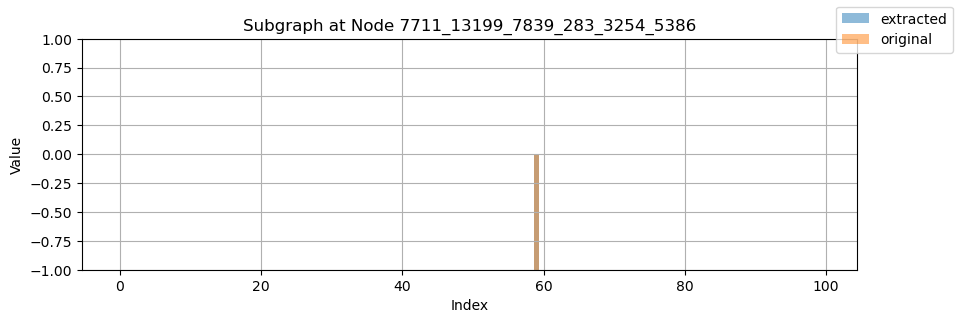

In [ ]:
for subgraph_central_node in list(history['betas'].keys())[:3]:
    fig, ax = plt.subplots(1, 1,figsize=(10,3))
    final_beta = history['betas'][subgraph_central_node][-1]
    extracted_watermark = copy.deepcopy(final_beta)#torch.sign(beta)
    extracted_watermark[extracted_watermark==0]=0
    extracted_watermark[extracted_watermark>0]=1
    extracted_watermark[extracted_watermark<0]=-1

    ax.bar(range(len(extracted_watermark[:100])),extracted_watermark[:100].numpy(),label='extracted',alpha=0.5)
    ax.bar(range(len(watermark[:100])),watermark[:100].numpy(),label='original',alpha=0.5)
    fig.legend()
    ax.set_title(f'Subgraph at Node {subgraph_central_node}')

    ax.set_xlabel('Index')  # X-axis label
    ax.set_ylabel('Value')  # Y-axis label
    ax.grid(True)  # Enable grid
    ax.set_ylim(-1,1)

In [ ]:
beta

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

tensor(5.9284)


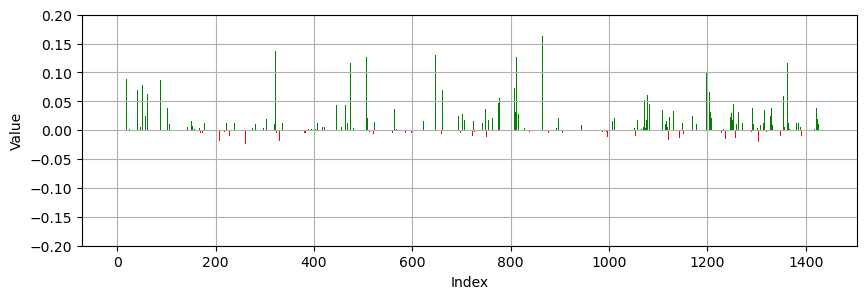

tensor(4.5475)


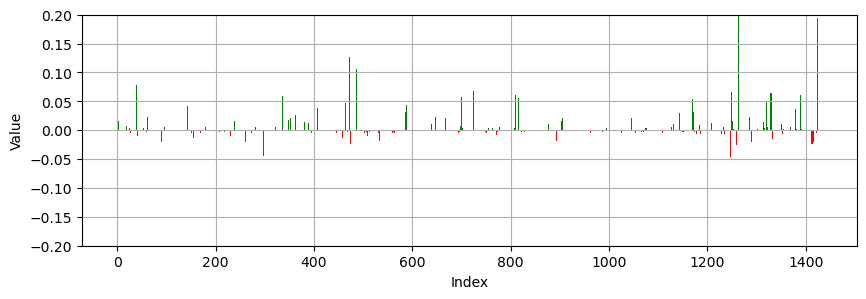

tensor(5.6710)


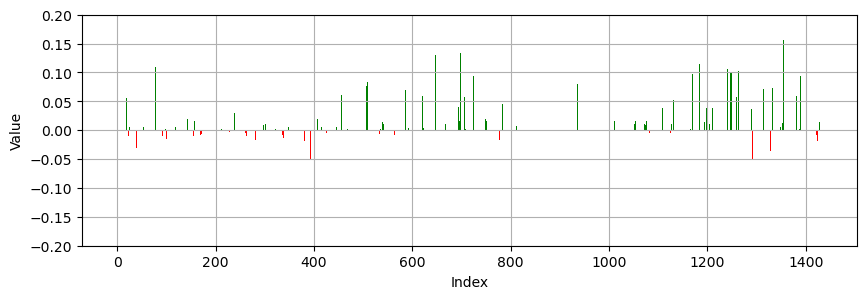

tensor(6.1949)


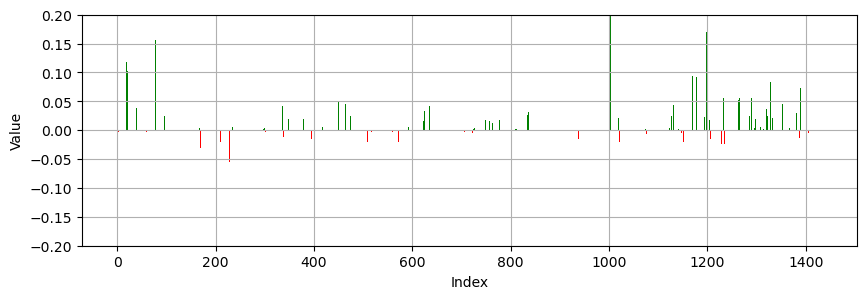

tensor(4.1550)


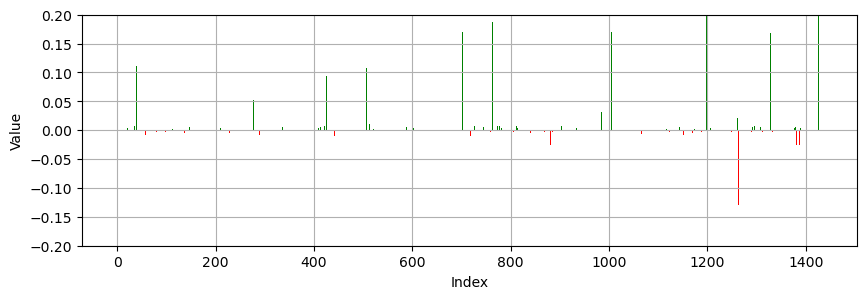

tensor(3.8974)


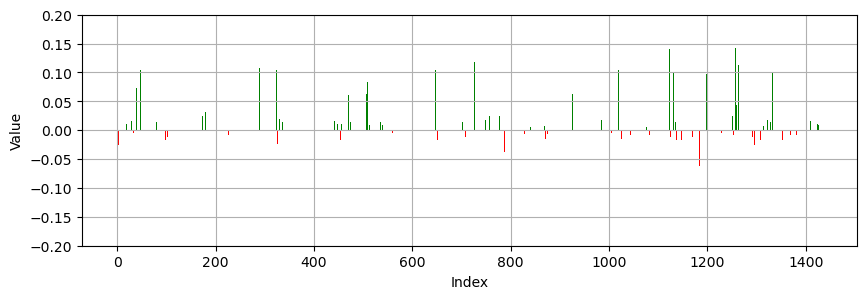

tensor(3.2936)


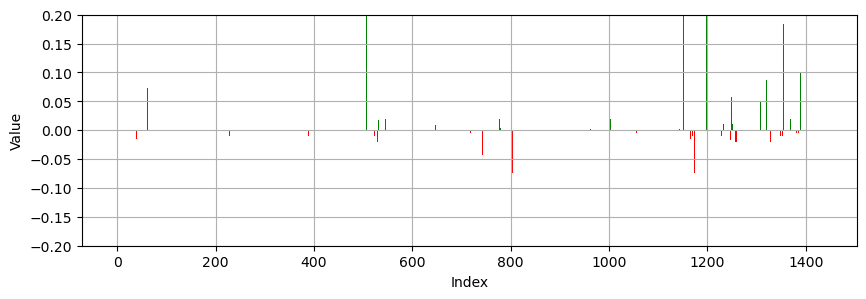

tensor(1.2718)


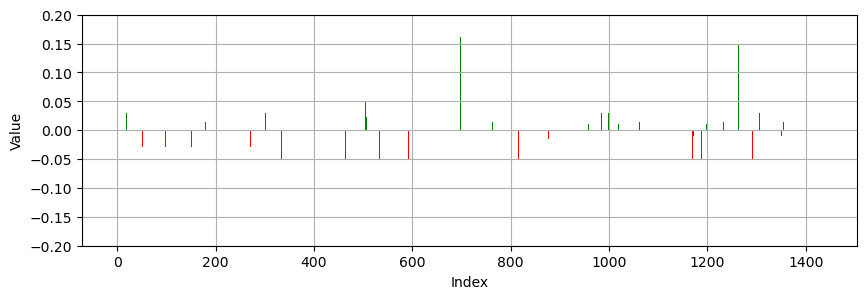

tensor(3.3792)


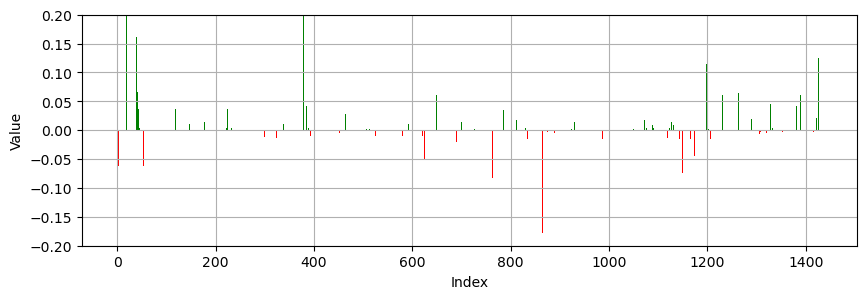

tensor(6.1817)


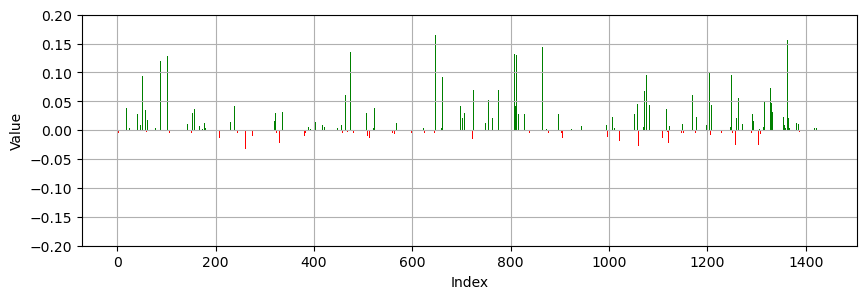

tensor(1.6128)


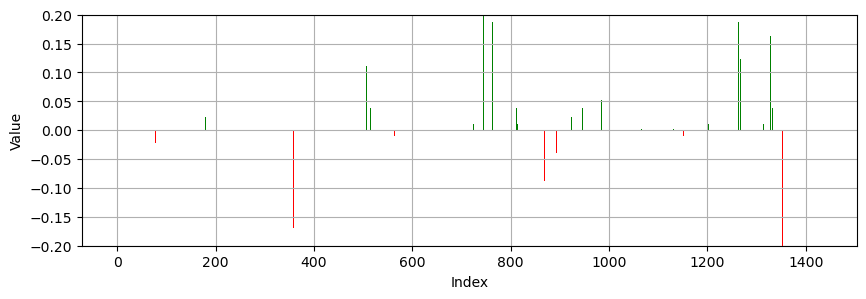

tensor(3.5882)


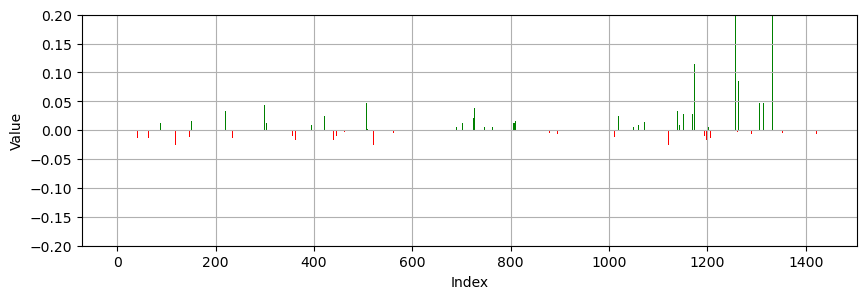

tensor(3.3046)


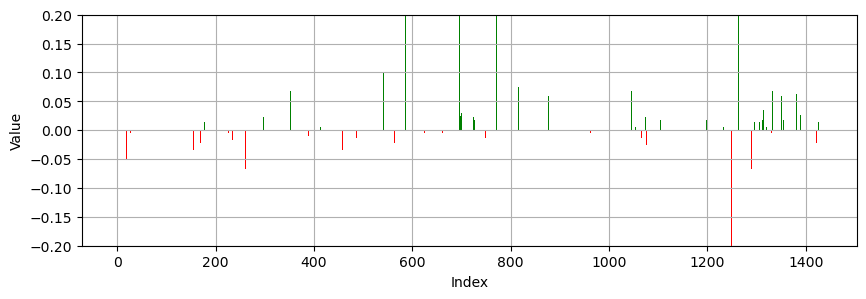

In [ ]:
frame=-1
# for frame in [0,-1]:
for central_node in history['betas'].keys():
    fig, ax = plt.subplots(1, 1,figsize=(10,3))
    beta = history['betas'][central_node][-1].clone().detach()
    extracted_watermark = copy.deepcopy(beta)#torch.sign(beta)
    extracted_watermark[extracted_watermark>=0]=1
    extracted_watermark[extracted_watermark<0]=-1

    same_betas, different_betas = copy.deepcopy(beta), copy.deepcopy(beta)
    same     = extracted_watermark==watermark
    not_same = extracted_watermark!=watermark

    same_betas[not_same]=0
    same_betas=torch.abs(same_betas)

    different_betas[same]=0
    different_betas=-torch.abs(different_betas)

    print(torch.sum(same_betas)+torch.sum(different_betas))
    

    ax.bar(range(len(same_betas)), same_betas.numpy(), color='green')
    ax.bar(range(len(different_betas)), different_betas.numpy(), color='red')
    ax.set_xlabel('Index')  # X-axis label
    ax.set_ylabel('Value')  # Y-axis label
    ax.grid(True)  # Enable grid
    ax.set_ylim(-0.2,0.2)
    plt.show()

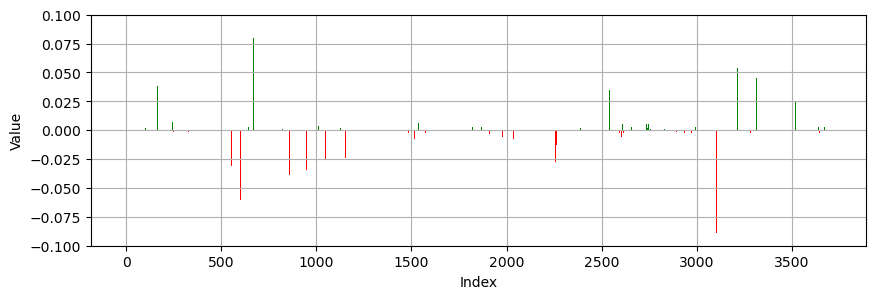

In [ ]:

fig, ax = plt.subplots(1, 1,figsize=(10,3))
def update(frame):
    ax.clear()
    beta = history['betas'][frame].clone().detach()
    extracted_watermark = copy.deepcopy(beta)#torch.sign(beta)
    extracted_watermark[extracted_watermark>0]=1
    extracted_watermark[extracted_watermark<0]=-1

    same_betas, different_betas = copy.deepcopy(beta), copy.deepcopy(beta)
    same     = extracted_watermark==watermark
    not_same = extracted_watermark!=watermark
    
    same_betas[not_same]=0
    same_betas=torch.abs(same_betas)

    different_betas[same]=0
    different_betas=-torch.abs(different_betas)

    ax.bar(range(len(same_betas)), same_betas.numpy(), color='green')
    ax.bar(range(len(different_betas)), different_betas.numpy(), color='red')
    ax.set_xlabel('Index')  # X-axis label
    ax.set_ylabel('Value')  # Y-axis label
    ax.grid(True)  # Enable grid
    ax.set_ylim(-0.1,0.1)
    return ax,

ani = FuncAnimation(fig, update, frames=len(history['betas']))
HTML(ani.to_jshtml())


# 